#  **Introduction**
In this notebook, we will work on processing and analyzing the dataset that we all collaborate to collect, containing news in Arabic. The goal is to clean the data and prepare it for deeper analysis then to train our models.

##  **Fake News Detection Project Pipeline**

This project follows a structured pipeline to detect fake news in Arabic texts using machine learning models. The full workflow consists of the following stages:

###  Pipeline Overview:

1. **Load Dataset**  
   Load the news articles dataset from a CSV file.

2. **Preprocess Text**  
   Clean the Arabic text using a custom `clean_arabic_text()` function (removing punctuation, links, tashkeel, etc.).

3. **Feature Extraction**  
   Convert cleaned text into numerical features using **TF-IDF vectorization**.

4. **Train Models**  
   Train multiple classifiers including **BERT**, **SVC**, **Random Forest**, **Logistic Regression**, and **XGBoost**.

5. **Evaluate Models**  
   Evaluate models using **ROC Curve**, **Precision-Recall Curve**, **AUC**, and other metrics.

6. **Save Model & Vectorizer**  
   Save the best-performing model and vectorizer using `pickle` for later use.

7. **Prediction on New Text**  
   Load the saved model/vectorizer and make predictions on unseen text samples.

8. **Display Results**  
   Display the predicted label ("Real" or "Fake") along with a confidence score.

---

###  **Pipeline Diagram:**

fake_news_pipeline.svg


## **Installing and Importing necessary libraries and packages**

In [ ]:
!pip install arabic_reshaper python-bidi --quiet

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 292.9/292.9 kB 11.6 MB/s eta 0:00:00


In [ ]:
!pip install python-bidi
!pip install wordcloud

In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import arabic_reshaper
from bidi.algorithm import get_display

# **1. Data Loading**

### **‚Üí Loading the Data File**
We start by loading the data from a CSV file titled "merged_cleaned.csv". This file contains news in Arabic with columns such as title, content, date, platform, and label (real or fake).

In [ ]:
data = pd.read_csv("merged_cleaned.csv")
data.head()

Id                 date   platform  \
0   1  2023-01-11 00:00:00  Aljazeera   
1   2  2023-01-11 00:00:00  Aljazeera   
2   3  2023-01-11 00:00:00  Aljazeera   
3   4  2023-02-11 00:00:00  Aljazeera   
4   5  2023-03-11 00:00:00  Aljazeera   

                                               title  \
0  ÿßŸÑÿ∂ŸÅÿ© ÿßŸÑÿ∫ÿ±ÿ®Ÿäÿ©.. ÿßŸÑÿßÿ≠ÿ™ŸÑÿßŸÑ ŸäŸáÿØŸÖ 17 ŸÖŸÜÿ≤ŸÑÿß ÿ™ÿßÿ±ŸäÿÆŸäÿß...   
1  ŸÖÿ∏ÿßŸáÿ±ÿßÿ™ ÿ®ŸÖÿØŸÜ ÿ£Ÿàÿ±Ÿàÿ®Ÿäÿ© ÿ™ÿ∂ÿßŸÖŸÜÿß ŸÖÿπ ÿ∫ÿ≤ÿ© Ÿàÿ≠ÿ¥ŸàÿØ ÿ£ŸÖÿßŸÖ ...   
2  ÿ¥ŸáÿØÿßÿ° ŸÅŸä ÿ¨ŸÜŸäŸÜ Ÿàÿ∑ŸàŸÑŸÉÿ±ŸÖ Ÿàÿ•ÿ∂ÿ±ÿßÿ® ÿπÿßŸÖ ÿ®ÿßŸÑÿ∂ŸÅÿ© ÿßŸÑÿ∫ÿ±ÿ®Ÿä...   
3  ÿ£ÿ®Ÿà ÿπÿ®ŸäÿØÿ©: ÿÆÿ≥ÿßÿ¶ÿ± ÿßŸÑÿπÿØŸà ÿ£ŸÉÿ®ÿ± ÿ®ŸÉÿ´Ÿäÿ± ŸÖŸÖÿß ŸäÿπŸÑŸÜ Ÿàÿ≥ŸÜ...   
4         9 ÿ¥ŸáÿØÿßÿ° ÿ®ÿßŸÑÿ∂ŸÅÿ© ŸàÿßŸÑÿßÿ≠ÿ™ŸÑÿßŸÑ Ÿäÿ¥ŸÜ ÿ≠ŸÖŸÑÿ© ÿßÿπÿ™ŸÇÿßŸÑÿßÿ™   

                                        News content Label  
0  ŸáÿØŸÖÿ™ ŸÇŸàÿßÿ™ ÿßŸÑÿßÿ≠ÿ™ŸÑÿßŸÑ ÿßŸÑÿ•ÿ≥ÿ±ÿßÿ¶ŸäŸÑŸä -ÿßŸÑŸäŸàŸÖ ÿßŸÑÿ£ÿ±ÿ®ÿπÿßÿ°-...  real  
1  ÿÆÿ±ÿ¨ÿ™ ŸÖÿ∏ÿßŸáÿ±ÿßÿ™ ŸÅŸä ÿπÿØÿØ ŸÖŸÜ ÿßŸÑŸÖÿØŸÜ ÿßŸÑÿ£Ÿàÿ±Ÿàÿ®Ÿäÿ© ŸÖÿ≥ÿßÿ° ÿßŸÑ...  real  
2  ÿßÿ≥ÿ™ÿ¥ŸáÿØ 4 ŸÅŸÑÿ≥ÿ∑ŸäŸÜŸäŸäŸÜ Ÿàÿßÿπÿ™ŸÇŸÑ ÿπÿ¥ÿ±ÿßÿ™ ÿ¢ÿÆÿ±ŸàŸÜ -ÿßŸÑŸäŸàŸÖ ÿß...  real  
3  ÿ£ŸÉÿØ ÿßŸÑŸÜÿßÿ∑ŸÇ ÿ®ÿßÿ≥ŸÖŸÉÿ™ÿßÿ¶ÿ® ÿßŸÑÿ¥ŸáŸäÿØ ÿπÿ≤ ÿßŸÑÿØŸäŸÜ ÿßŸÑŸÇÿ≥ÿßŸÖ-ÿßŸÑ...  real  
4  ÿßÿ≥ÿ™ÿ¥ŸáÿØ 9 ŸÅŸÑÿ≥ÿ∑ŸäŸÜŸäŸäŸÜ ŸÅŸä ŸÖŸàÿßÿ¨Ÿáÿßÿ™ ÿßŸÜÿØŸÑÿπÿ™ ŸÖÿπ ŸÇŸàÿßÿ™ ÿß...  real

### **‚Üí Checking for Missing Values**
We check for missing values in the "News content" column to ensure data quality before processing.

In [ ]:
num_missing_titles = data['News content'].isna().sum()
print(num_missing_titles)

0


# **2. Exploratory Data Analysis**



### **‚Üí Univariate Analysis**
We explore the distribution of individual variables such as *labels*, *years*, *months*, and *platforms*

In [ ]:
# Dealing eith Arabic text
def reshape_arabic(text):
    return get_display(arabic_reshaper.reshape(str(text)))

In [ ]:
data['Arabic_Label'] = data['Label'].map({"fake": reshape_arabic('ŸÖÿ≤ŸäŸÅ'), "real": reshape_arabic('ÿ≠ŸÇŸäŸÇŸä')})

#### **1. Label Distribution**
We analyze the distribution of news between "real" and "fake" using a bar chart.

In [ ]:
data['Label'].value_counts()

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Arabic_Label', data=data, palette='hls')
plt.title(reshape_arabic("ÿ™Ÿàÿ≤Ÿäÿπ ŸÜŸàÿπ ÿßŸÑÿ£ÿÆÿ®ÿßÿ±"))
plt.xlabel(reshape_arabic("ŸÜŸàÿπ ÿßŸÑÿÆÿ®ÿ±"))
plt.ylabel(reshape_arabic("ÿßŸÑÿπÿØÿØ"))
plt.xticks(rotation=0)
plt.show()

/tmp/ipython-input-8-368140946.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Arabic_Label', data=data, palette='hls')


**The bar chart shows that there are more real news articles compared to fake ones, indicating an imbalance in the labels.**

#### **2. Year Distribution**
We explore the distribution of news across years.

In [ ]:
year = pd.to_datetime(data['date']).dt.year
year_grouped = year.apply(lambda x: '‚â§2022' if x <= 2022 else str(x))
order = ['‚â§2022', '2023', '2024', '2025']
year_grouped = pd.Categorical(year_grouped, categories=order, ordered=True)
year_counts = year_grouped.value_counts().sort_index()
year_counts

‚â§2022      17
2023     1292
2024     3094
2025      949
Name: count, dtype: int64

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x=year_grouped, palette='Set1')
plt.title(reshape_arabic('ÿßŸÑÿ™Ÿàÿ≤Ÿäÿπ ÿ≠ÿ≥ÿ® ÿßŸÑÿ≥ŸÜŸàÿßÿ™'))
plt.xlabel(reshape_arabic('ÿßŸÑÿ≥ŸÜÿ©'))
plt.ylabel(reshape_arabic('ÿßŸÑÿπÿØÿØ'))
plt.xticks(rotation=0)
plt.show()

/tmp/ipython-input-10-4265389522.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=year_grouped, palette='Set1')


**The chart shows that most news articles are from a specific year (e.g., 2024), which may reflect increased data collection during that period.**

#### **3. Month Distribution**
We analyze the distribution of news across months.

In [ ]:
month = pd.to_datetime(data['date']).dt.month
month_order = [str(i) for i in range(1, 13)]
month_grouped = pd.Categorical(month.astype(str), categories=month_order, ordered=True)


/tmp/ipython-input-12-2288596518.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=month_grouped, palette='Set2')


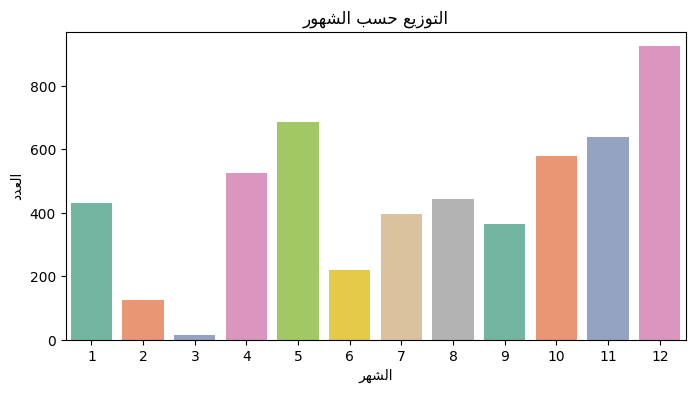

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(x=month_grouped, palette='Set2')
plt.title(reshape_arabic('ÿßŸÑÿ™Ÿàÿ≤Ÿäÿπ ÿ≠ÿ≥ÿ® ÿßŸÑÿ¥ŸáŸàÿ±'))
plt.xlabel(reshape_arabic('ÿßŸÑÿ¥Ÿáÿ±'))
plt.ylabel(reshape_arabic('ÿßŸÑÿπÿØÿØ'))
plt.xticks(rotation=0)
plt.show()

**The chart illustrates the distribution of news across months, helping to identify any seasonal patterns.**

#### **4. Platform Distribution**
We explore the distribution of news across platforms.

In [ ]:
platform_counts = data['platform'].value_counts()
top_platforms = platform_counts.nlargest(4).index
platform_grouped = data['platform'].apply(lambda x: x if x in top_platforms else 'Others')
order = list(top_platforms) + ['Others']
platform_grouped.value_counts()

platform
Aljazeera    3422
Misbar       1426
Tibyan        247
Others        193
X              64
Name: count, dtype: int64

/tmp/ipython-input-14-3220097531.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=platform_grouped,order=order ,palette='Set2')


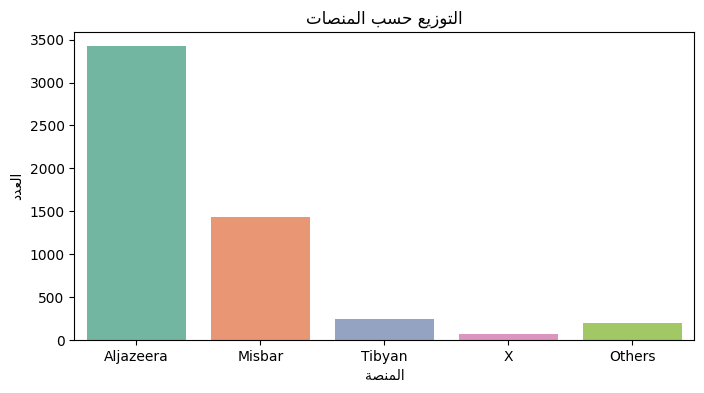

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(x=platform_grouped,order=order ,palette='Set2')
plt.title(reshape_arabic('ÿßŸÑÿ™Ÿàÿ≤Ÿäÿπ ÿ≠ÿ≥ÿ® ÿßŸÑŸÖŸÜÿµÿßÿ™'))
plt.xlabel(reshape_arabic('ÿßŸÑŸÖŸÜÿµÿ©'))
plt.ylabel(reshape_arabic('ÿßŸÑÿπÿØÿØ'))
plt.xticks(rotation=0)
plt.show()

**The chart indicates that a particular platform (e.g., Aljazeera) dominates the dataset, which may influence the analysis of labels.**

### **‚Üí Bivariate Analysis**
We examine the relationships between variables to understand their interactions.

#### **1.Relationship between Platform and News Label**
We analyze how real and fake news are distributed across platforms.

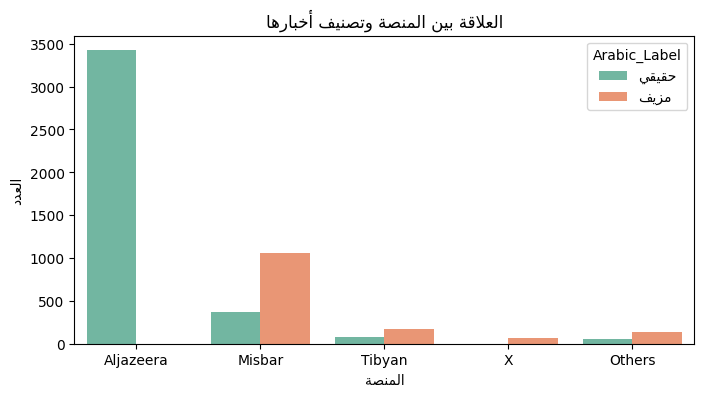

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(x=platform_grouped,order=order, hue='Arabic_Label', data=data, palette='Set2')
plt.title(reshape_arabic('ÿßŸÑÿπŸÑÿßŸÇÿ© ÿ®ŸäŸÜ ÿßŸÑŸÖŸÜÿµÿ© Ÿàÿ™ÿµŸÜŸäŸÅ ÿ£ÿÆÿ®ÿßÿ±Ÿáÿß'))
plt.xlabel(reshape_arabic('ÿßŸÑŸÖŸÜÿµÿ©'))
plt.ylabel(reshape_arabic('ÿßŸÑÿπÿØÿØ'))
plt.show()

**The chart shows that some platforms have a higher proportion of fake news, indicating differences in content quality.**

#### **2. Relationship between Year and News Label**
We examine the distribution of real and fake news across years.

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(x=year_grouped,  hue='Arabic_Label', data=data, palette='Set2')
plt.title(reshape_arabic('ÿßŸÑÿπŸÑÿßŸÇÿ© ÿ®ŸäŸÜ ÿßŸÑÿ≥ŸÜÿ© Ÿàÿ™ÿµŸÜŸäŸÅ ÿßŸÑÿ£ÿÆÿ®ÿßÿ±'))
plt.xlabel(reshape_arabic('ÿßŸÑÿ≥ŸÜÿ©'))
plt.ylabel(reshape_arabic('ÿßŸÑÿπÿØÿØ'))
plt.show()

**The chart reveals temporal patterns in the distribution of real and fake news, possibly related to specific events.**

#### **3. Relationship between Month and News Label**
We analyze the distribution of news by months and labels.

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(x=month_grouped,  hue='Arabic_Label', data=data, palette='Set2')
plt.title(reshape_arabic('ÿßŸÑÿπŸÑÿßŸÇÿ© ÿ®ŸäŸÜ ÿßŸÑÿ¥ŸáŸàÿ± Ÿàÿ™ÿµŸÜŸäŸÅ ÿßŸÑÿ£ÿÆÿ®ÿßÿ±'))
plt.xlabel(reshape_arabic('ÿßŸÑÿ¥Ÿáÿ±'))
plt.ylabel(reshape_arabic('ÿßŸÑÿπÿØÿØ'))
plt.show()

**The chart indicates whether there are seasonal patterns in fake or real news.**

# **3. Data Processing**

### **‚Üí Merging Title with News Content**
We merge the title and news content into a single field called *full_news* to facilitate text processing later.

In [ ]:
processedData= pd.DataFrame()

In [ ]:
processedData['full_news'] = data['title'] + " " + data['News content']

### **‚Üí Converting Labels to Numbers**
We convert the textual labels ("real", "fake") to numerical values (1, 0) to make them suitable for machine learning models.

In [ ]:
processedData['Label'] = data['Label'].map({'real': 1, 'fake': 0})
processedData.head()

full_news  Label
0  ÿßŸÑÿ∂ŸÅÿ© ÿßŸÑÿ∫ÿ±ÿ®Ÿäÿ©.. ÿßŸÑÿßÿ≠ÿ™ŸÑÿßŸÑ ŸäŸáÿØŸÖ 17 ŸÖŸÜÿ≤ŸÑÿß ÿ™ÿßÿ±ŸäÿÆŸäÿß...      1
1  ŸÖÿ∏ÿßŸáÿ±ÿßÿ™ ÿ®ŸÖÿØŸÜ ÿ£Ÿàÿ±Ÿàÿ®Ÿäÿ© ÿ™ÿ∂ÿßŸÖŸÜÿß ŸÖÿπ ÿ∫ÿ≤ÿ© Ÿàÿ≠ÿ¥ŸàÿØ ÿ£ŸÖÿßŸÖ ...      1
2  ÿ¥ŸáÿØÿßÿ° ŸÅŸä ÿ¨ŸÜŸäŸÜ Ÿàÿ∑ŸàŸÑŸÉÿ±ŸÖ Ÿàÿ•ÿ∂ÿ±ÿßÿ® ÿπÿßŸÖ ÿ®ÿßŸÑÿ∂ŸÅÿ© ÿßŸÑÿ∫ÿ±ÿ®Ÿä...      1
3  ÿ£ÿ®Ÿà ÿπÿ®ŸäÿØÿ©: ÿÆÿ≥ÿßÿ¶ÿ± ÿßŸÑÿπÿØŸà ÿ£ŸÉÿ®ÿ± ÿ®ŸÉÿ´Ÿäÿ± ŸÖŸÖÿß ŸäÿπŸÑŸÜ Ÿàÿ≥ŸÜ...      1
4  9 ÿ¥ŸáÿØÿßÿ° ÿ®ÿßŸÑÿ∂ŸÅÿ© ŸàÿßŸÑÿßÿ≠ÿ™ŸÑÿßŸÑ Ÿäÿ¥ŸÜ ÿ≠ŸÖŸÑÿ© ÿßÿπÿ™ŸÇÿßŸÑÿßÿ™ ÿßÿ≥ÿ™...      1

### **‚Üí Text Cleaning**
We clean the texts by removing links, HTML tags, emojis, and Arabic diacritics, while keeping only Arabic texts.

In [ ]:
import re

def remove_emojis(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"
        u"\U0001F300-\U0001F5FF"
        u"\U0001F680-\U0001F6FF"
        u"\U0001F1E0-\U0001F1FF"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def clean_text(text):
    if not isinstance(text, str):
        return ""

    # Remove URLs
    text = re.sub(r'http\S+|www.\S+|pic\.twitter\.com/\S+', '', text)


    # Remove HTML
    text = re.sub(r'<.*?>', '', text)


    # Remove Emojies
    text = remove_emojis(text)


    # Remove Arabic diacritics
    text = re.sub(r'[\u064B-\u0652]', '', text)


    # # Remove punctuation (Arabic and general)
    # text = re.sub(r'[ŸÄÿåÿõÿü!:\.\,\(\)\[\]\{\}"\'¬´¬ª\-_~‚Ä¶]', '', text)


    text = re.sub(r'[ÿ•ÿ£ÿ¢ÿß]', 'ÿß', text)

    lines = text.split('\n')


    cleaned_lines = []
    for line in lines:
        # Remove line if it not arabic
        if re.fullmatch(r'[^\u0600-\u06FF]+', line.strip()):
            continue


        # Keep Arabic lines
        line = re.sub(r'[^\u0600-\u06FF\s]', '', line)


        # Remove empty lines
        if line.strip():
            cleaned_lines.append(line.strip())

    # Join the cleaned lines
    return '\n'.join(cleaned_lines)


In [ ]:
processedData['full_news'] = processedData['full_news'].apply(clean_text)

**Why Cleaning?**

Removing links, HTML tags, emojis, and diacritics is necessary because they do not contribute to the meaning of the text and can interfere with natural language processing algorithms.

### **‚Üí Removing Stop Words**
We remove common stop words like "Ÿà", "ŸÅŸä", "ÿπŸÑŸâ" to reduce noise and focus on meaningful words.

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('arabic'))

In [ ]:
processedData['full_news_no_stopwords'] = processedData['full_news'].apply(
    lambda text: ' '.join([word for word in text.split() if word not in stop_words])
)

In [ ]:
import requests

url = "https://raw.githubusercontent.com/mohataher/arabic-stop-words/master/list.txt"
response = requests.get(url)

with open("list.txt", "w", encoding="utf-8") as f:
    f.write(response.text)

with open("list.txt", encoding="utf-8") as f:
    arabic_stopwords = set(f.read().splitlines())



In [ ]:
processedData['full_news_no_stopwords'] = processedData['full_news_no_stopwords'].apply(
    lambda text: ' '.join([word for word in text.split() if word not in arabic_stopwords])
)

In [ ]:
processedData.to_csv('ProcessedData_StopwordsStep.csv', index=False, encoding='utf-8-sig')


In [ ]:
processedData.head()

full_news  Label  \
0  ÿßŸÑÿ∂ŸÅÿ© ÿßŸÑÿ∫ÿ±ÿ®Ÿäÿ© ÿßŸÑÿßÿ≠ÿ™ŸÑÿßŸÑ ŸäŸáÿØŸÖ  ŸÖŸÜÿ≤ŸÑÿß ÿ™ÿßÿ±ŸäÿÆŸäÿß ŸàŸÖÿ≥...      1   
1  ŸÖÿ∏ÿßŸáÿ±ÿßÿ™ ÿ®ŸÖÿØŸÜ ÿßŸàÿ±Ÿàÿ®Ÿäÿ© ÿ™ÿ∂ÿßŸÖŸÜÿß ŸÖÿπ ÿ∫ÿ≤ÿ© Ÿàÿ≠ÿ¥ŸàÿØ ÿßŸÖÿßŸÖ ...      1   
2  ÿ¥ŸáÿØÿßÿ° ŸÅŸä ÿ¨ŸÜŸäŸÜ Ÿàÿ∑ŸàŸÑŸÉÿ±ŸÖ Ÿàÿßÿ∂ÿ±ÿßÿ® ÿπÿßŸÖ ÿ®ÿßŸÑÿ∂ŸÅÿ© ÿßŸÑÿ∫ÿ±ÿ®Ÿä...      1   
3  ÿßÿ®Ÿà ÿπÿ®ŸäÿØÿ© ÿÆÿ≥ÿßÿ¶ÿ± ÿßŸÑÿπÿØŸà ÿßŸÉÿ®ÿ± ÿ®ŸÉÿ´Ÿäÿ± ŸÖŸÖÿß ŸäÿπŸÑŸÜ Ÿàÿ≥ŸÜÿ¨...      1   
4  ÿ¥ŸáÿØÿßÿ° ÿ®ÿßŸÑÿ∂ŸÅÿ© ŸàÿßŸÑÿßÿ≠ÿ™ŸÑÿßŸÑ Ÿäÿ¥ŸÜ ÿ≠ŸÖŸÑÿ© ÿßÿπÿ™ŸÇÿßŸÑÿßÿ™ ÿßÿ≥ÿ™ÿ¥Ÿá...      1   

                              full_news_no_stopwords  
0  ÿßŸÑÿ∂ŸÅÿ© ÿßŸÑÿ∫ÿ±ÿ®Ÿäÿ© ÿßŸÑÿßÿ≠ÿ™ŸÑÿßŸÑ ŸäŸáÿØŸÖ ŸÖŸÜÿ≤ŸÑÿß ÿ™ÿßÿ±ŸäÿÆŸäÿß ŸàŸÖÿ≥Ÿä...  
1  ŸÖÿ∏ÿßŸáÿ±ÿßÿ™ ÿ®ŸÖÿØŸÜ ÿßŸàÿ±Ÿàÿ®Ÿäÿ© ÿ™ÿ∂ÿßŸÖŸÜÿß ÿ∫ÿ≤ÿ© Ÿàÿ≠ÿ¥ŸàÿØ ÿØÿßŸàŸÜŸäŸÜÿ∫ ...  
2  ÿ¥ŸáÿØÿßÿ° ÿ¨ŸÜŸäŸÜ Ÿàÿ∑ŸàŸÑŸÉÿ±ŸÖ Ÿàÿßÿ∂ÿ±ÿßÿ® ÿ®ÿßŸÑÿ∂ŸÅÿ© ÿßŸÑÿ∫ÿ±ÿ®Ÿäÿ© ÿ™ŸÜÿØŸäÿØ...  
3  ÿßÿ®Ÿà ÿπÿ®ŸäÿØÿ© ÿÆÿ≥ÿßÿ¶ÿ± ÿßŸÑÿπÿØŸà ÿßŸÉÿ®ÿ± ÿ®ŸÉÿ´Ÿäÿ± ŸäÿπŸÑŸÜ Ÿàÿ≥ŸÜÿ¨ÿπŸÑ ÿ∫...  
4  ÿ¥ŸáÿØÿßÿ° ÿ®ÿßŸÑÿ∂ŸÅÿ© ŸàÿßŸÑÿßÿ≠ÿ™ŸÑÿßŸÑ Ÿäÿ¥ŸÜ ÿ≠ŸÖŸÑÿ© ÿßÿπÿ™ŸÇÿßŸÑÿßÿ™ ÿßÿ≥ÿ™ÿ¥Ÿá...

#### **Words Cloud example before removing stop words & after removing stop words**

In [ ]:
from collections import Counter
import arabic_reshaper
from bidi.algorithm import get_display
from wordcloud import WordCloud, ImageColorGenerator
from IPython.display import Image, display

In [ ]:
from IPython.display import Image, display, Markdown

In [ ]:
font_file = '/content/arial.ttf'

In [ ]:
text = " ".join(arabic_reshaper.reshape(t) for t in processedData['full_news'].dropna())

# create and display the wordcloud
wordcloud = WordCloud(font_path=font_file, width = 3500, height = 2000, random_state=1,
                      background_color='white', colormap='Set2', collocations=False,).generate(text)

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig("with_stops.png", dpi=300, bbox_inches='tight')
plt.close()

###  Words Cloud before removing stop words

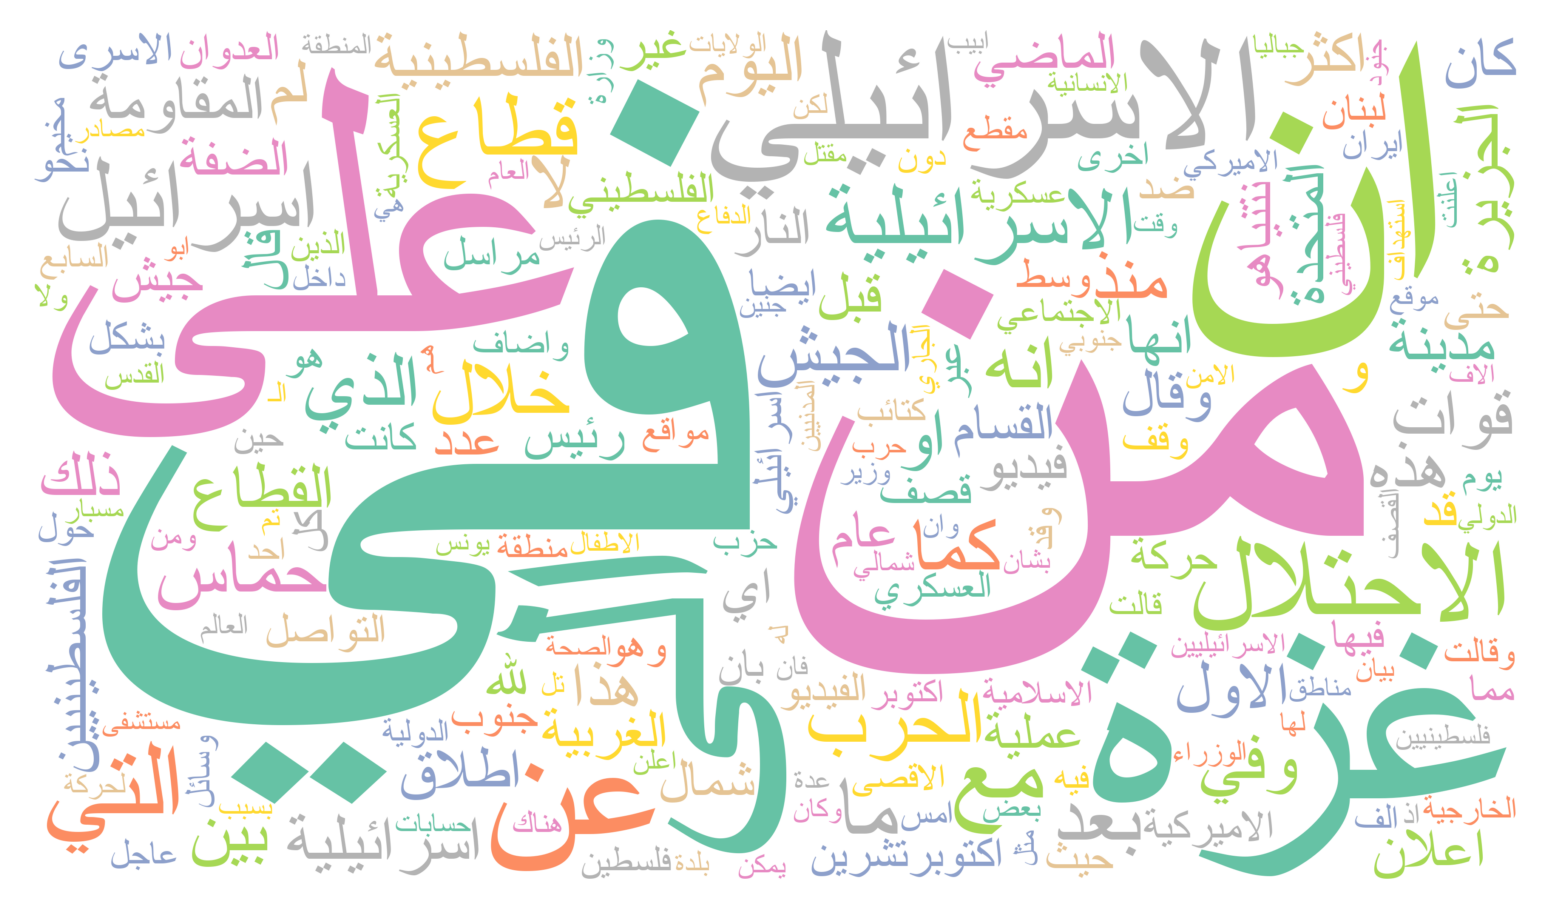

In [ ]:
display(Markdown("###  Words Cloud before removing stop words"))
display(Image(filename='with_stops.png',width=600, height=600))

In [ ]:
text = " ".join(arabic_reshaper.reshape(t) for t in processedData['full_news_no_stopwords'].dropna())

# create and display the wordcloud
wordcloud = WordCloud(font_path=font_file, width = 3500, height = 2000, random_state=1,
                      background_color='white', colormap='Set2', collocations=False,).generate(text)

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig("without_stops.png", dpi=300, bbox_inches='tight')
plt.close()

###  Words Cloud after removing stop words

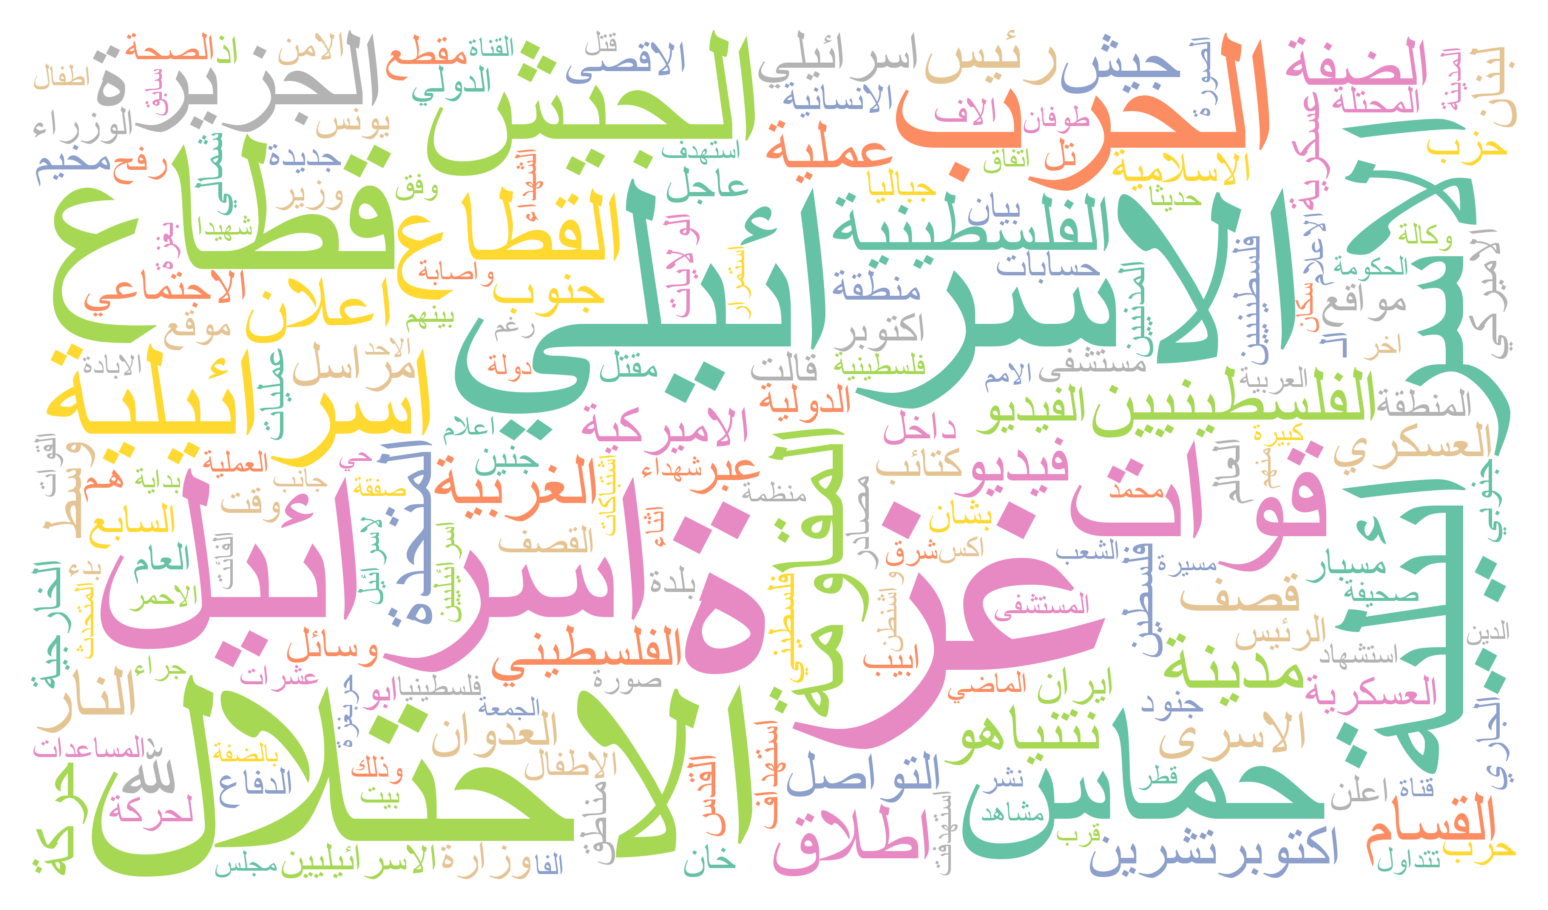

In [ ]:
display(Markdown("###  Words Cloud after removing stop words"))

display(Image(filename='without_stops.png',width=600, height=600))

In [ ]:
from IPython.display import display, Markdown
test = 800

original_title = data.iloc[test]['title']
original_content = data.iloc[test]['News content']

cleaned = processedData.iloc[test]['full_news']
cleaned_no_stopwords = processedData.iloc[test]['full_news_no_stopwords']

display(Markdown("##  Original News Content"))
display(Markdown(f"**Title:** {original_title}"))
display(Markdown(f"**Length:** {len(original_title + ' ' + original_content)} characters"))
display(Markdown(original_content))

display(Markdown("##  Cleaned News"))
display(Markdown(f"**Length:** {len(cleaned)} characters"))
display(Markdown(cleaned))

display(Markdown("##  Cleaned News (No Stopwords)"))
display(Markdown(f"**Length:** {len(cleaned_no_stopwords)} characters"))
display(Markdown(cleaned_no_stopwords))


##  Original News Content

**Title:** "ŸÑÿß ÿ™ÿ™ÿ±ŸÉŸàŸÜÿß ŸÜÿ¥ŸäÿÆ".. ÿßŸÑŸÇÿ≥ÿßŸÖ ÿ™ŸÜÿ¥ÿ± ÿ±ÿ≥ÿßŸÑÿ© ŸÖŸÜ ÿ£ÿ≥ÿ±Ÿâ ÿ•ÿ≥ÿ±ÿßÿ¶ŸäŸÑŸäŸäŸÜ ŸÑÿ≠ŸÉŸàŸÖÿ™ŸáŸÖ

**Length:** 1172 characters

ŸÜÿ¥ÿ±ÿ™ ŸÉÿ™ÿßÿ¶ÿ® ÿßŸÑŸÇÿ≥ÿßŸÖ -ÿßŸÑÿ¨ŸÜÿßÿ≠ ÿßŸÑÿπÿ≥ŸÉÿ±Ÿä ŸÑÿ≠ÿ±ŸÉÿ© ÿßŸÑŸÖŸÇÿßŸàŸÖÿ© ÿßŸÑÿ•ÿ≥ŸÑÿßŸÖŸäÿ© (ÿ≠ŸÖÿßÿ≥)- ŸÖŸÇÿ∑ÿπÿß ŸÖÿ±ÿ¶Ÿäÿß Ÿäÿ∏Ÿáÿ± ŸÅŸäŸá 3 ÿ£ÿ≥ÿ±Ÿâ ÿ•ÿ≥ÿ±ÿßÿ¶ŸäŸÑŸäŸäŸÜ ŸÅŸä ŸÇÿ∑ÿßÿπ ÿ∫ÿ≤ÿ© Ÿäÿ∑ÿßŸÑÿ®ŸàŸÜ ŸÇÿßÿØÿ™ŸáŸÖ ÿ®ÿπÿØŸÖ ÿ™ÿ±ŸÉŸáŸÖ ŸÅŸä ÿßŸÑÿ£ÿ≥ÿ± Ÿà"ÿ£ŸÑÿß Ÿäÿ¥ŸäÿÆŸàÿß ŸÅŸäŸá".

ŸàŸÇÿßŸÑ ÿ£ÿ≠ÿØ ÿßŸÑÿ£ÿ≥ÿ±Ÿâ ÿßŸÑÿ•ÿ≥ÿ±ÿßÿ¶ŸäŸÑŸäŸäŸÜ ŸàŸäŸèÿØÿπŸâ ÿ≠ÿßŸäŸäŸÖ ÿ®ÿ±Ÿä (79 ÿπÿßŸÖÿß)ÿå ÿ•ŸÜŸá ŸÖŸÜ ŸÉŸäÿ®Ÿàÿ™ÿ≥ ŸÜŸäÿ± ÿπŸàÿ≤ÿå ŸàŸÖŸàÿ¨ŸàÿØ ŸÅŸä ÿßŸÑÿ£ÿ≥ÿ± ÿ®ÿ±ŸÅŸÇÿ© ŸÖÿ¨ŸÖŸàÿπÿ© ŸÉÿ®ÿßÿ± ŸÅŸä ÿßŸÑÿ≥ŸÜÿå ŸÖÿ±ÿ∂Ÿâ ÿ®ÿ£ŸÖÿ±ÿßÿ∂ ŸÖÿ≤ŸÖŸÜÿ©ÿå ŸàŸäÿπÿßŸÜŸàŸÜ ÿ∏ÿ±ŸàŸÅÿß ŸÇÿßÿ≥Ÿäÿ© ŸÑŸÑÿ∫ÿßŸäÿ©.

Ÿàÿ£ÿ∂ÿßŸÅ "ŸÜÿ≠ŸÜ ÿ¨ŸäŸÑ ÿ®ŸÜŸâ ÿßŸÑÿØŸàŸÑÿ© (ÿ•ÿ≥ÿ±ÿßÿ¶ŸäŸÑ)ÿå ŸàŸÜÿ≠ŸÜ ÿ¥ÿßÿ±ŸÉŸÜÿß ŸÅŸä ÿ®ŸÜÿßÿ° ÿßŸÑÿ¨Ÿäÿ¥ÿå ŸàŸÑÿß ÿ£ŸÅŸáŸÖ ŸÑŸÖÿßÿ∞ÿß ŸÜÿ≠ŸÜ ŸÖÿ™ÿ±ŸàŸÉŸàŸÜ ŸáŸÜÿßÿü"ÿå ŸÇÿ®ŸÑ ÿ£ŸÜ ŸäŸÉŸÖŸÑ ŸÖŸÜÿßÿ¥ÿØÿß ÿπŸÑŸâ ŸÖÿß Ÿäÿ®ÿØŸà ÿ±ÿ¶Ÿäÿ≥ ÿßŸÑŸàÿ≤ÿ±ÿßÿ° ÿßŸÑÿ•ÿ≥ÿ±ÿßÿ¶ŸäŸÑŸä ÿ®ŸÜŸäÿßŸÖŸäŸÜ ŸÜÿ™ŸÜŸäÿßŸáŸàÿå ÿ®ÿßŸÑŸÇŸàŸÑ "Ÿäÿ¨ÿ® ÿπŸÑŸäŸÉ ÿ£ŸÜ ÿ™ŸÅÿ±ÿ¨ ÿπŸÜÿß ÿ®ŸÉŸÑ ÿ´ŸÖŸÜ".

Ÿàÿ™ÿßÿ®ÿπ "ŸÜÿ≠ŸÜ ŸÑÿß ŸÜÿ±ŸäÿØ ÿ£ŸÜ ŸÜŸÉŸàŸÜ ÿ∂ÿ≠ÿßŸäÿß ŸÑÿßÿ≥ÿ™ŸáÿØÿßŸÅÿßÿ™ ÿ≥ŸÑÿßÿ≠ ÿßŸÑÿ¨Ÿàÿå ÿ£ŸÅÿ±ÿ¨ ÿπŸÜÿß ŸÖŸÜ ÿØŸàŸÜ ÿ£Ÿä ÿ¥ÿ±ÿ∑ÿå ŸàŸÑÿß ÿ™ÿ™ÿ±ŸÉŸàŸÜÿß ŸÜÿ¥ŸäÿÆ".

ŸàŸÜÿ¨ÿ≠ÿ™ Ÿàÿ≥ÿßÿ∑ÿ© ŸÇÿ∑ÿ±Ÿäÿ© ŸÅŸä ÿßŸÑÿ™ŸàÿµŸÑ ÿ•ŸÑŸâ ŸáÿØŸÜÿ© ÿ•ŸÜÿ≥ÿßŸÜŸäÿ© ŸÖÿ§ŸÇÿ™ÿ© ÿßÿ≥ÿ™ŸÖÿ±ÿ™ ÿ£ÿ≥ÿ®Ÿàÿπÿßÿå Ÿàÿ™ŸÖ ÿÆŸÑÿßŸÑŸáÿß ÿßŸÑÿ•ŸÅÿ±ÿßÿ¨ ÿπŸÜ ŸÖÿ≠ÿ™ÿ¨ÿ≤ŸäŸÜ ÿ•ÿ≥ÿ±ÿßÿ¶ŸäŸÑŸäŸäŸÜ ŸÅŸä ŸÇÿ∑ÿßÿπ ÿ∫ÿ≤ÿ©ÿå ŸÖŸÇÿßÿ®ŸÑ ÿ•ÿ∑ŸÑÿßŸÇ ÿ≥ÿ±ÿßÿ≠ ÿ£ÿ≥ÿ±Ÿâ ŸÅŸÑÿ≥ÿ∑ŸäŸÜŸäŸäŸÜ ŸÖŸÜ ÿßŸÑŸÜÿ≥ÿßÿ° ŸàÿßŸÑÿ£ÿ∑ŸÅÿßŸÑ ŸàŸÅŸÇ ŸÖÿπÿßÿØŸÑÿ© (1 ŸÖŸÇÿßÿ®ŸÑ 3)ÿå ŸÇÿ®ŸÑ ÿ£ŸÜ ÿ™ŸÜŸáÿßÿ± ÿßŸÑŸáÿØŸÜÿ© ŸÖÿ∑ŸÑÿπ ÿØŸäÿ≥ŸÖÿ®ÿ±/ŸÉÿßŸÜŸàŸÜ ÿßŸÑÿ£ŸàŸÑ ÿßŸÑÿ¨ÿßÿ±Ÿä.

Ÿàÿ™ÿ™ÿµÿßÿπÿØ ÿßŸÑŸÖÿ∏ÿßŸáÿ±ÿßÿ™ ŸÅŸä ÿ™ŸÑ ÿ£ÿ®Ÿäÿ® ÿßŸÑŸÖÿ∑ÿßŸÑÿ®ÿ© ÿ®ÿ∂ÿ±Ÿàÿ±ÿ© ÿ•ÿ®ÿ±ÿßŸÖ ÿµŸÅŸÇÿ© ÿ™ÿ®ÿßÿØŸÑ ÿ¨ÿØŸäÿØÿ© ÿÆÿßÿµÿ© ÿ®ÿπÿØ ŸÖŸÇÿ™ŸÑ 3 ÿ£ÿ≥ÿ±Ÿâ ÿ•ÿ≥ÿ±ÿßÿ¶ŸäŸÑŸäŸäŸÜ ŸÅŸä ÿ∫ÿ≤ÿ© ÿπŸÑŸâ ŸäÿØ ŸÇŸàÿßÿ™ ÿßŸÑÿßÿ≠ÿ™ŸÑÿßŸÑÿå ŸàŸáŸà ŸÖÿß ÿ£ÿ´ÿßÿ± ŸÖŸàÿ¨ÿ© ÿ∫ÿ∂ÿ® ÿπÿßÿ±ŸÖÿ© Ÿàÿ£ŸÑŸÇÿ™ ŸÖÿ≤ŸäÿØÿß ŸÖŸÜ ÿßŸÑÿ∂ÿ∫Ÿàÿ∑ ÿπŸÑŸâ ÿ≠ŸÉŸàŸÖÿ© ŸÜÿ™ŸÜŸäÿßŸáŸà ÿßŸÑŸäŸÖŸäŸÜŸäÿ©.

##  Cleaned News

**Length:** 1131 characters

ŸÑÿß ÿ™ÿ™ÿ±ŸÉŸàŸÜÿß ŸÜÿ¥ŸäÿÆ ÿßŸÑŸÇÿ≥ÿßŸÖ ÿ™ŸÜÿ¥ÿ± ÿ±ÿ≥ÿßŸÑÿ© ŸÖŸÜ ÿßÿ≥ÿ±Ÿâ ÿßÿ≥ÿ±ÿßÿ¶ŸäŸÑŸäŸäŸÜ ŸÑÿ≠ŸÉŸàŸÖÿ™ŸáŸÖ ŸÜÿ¥ÿ±ÿ™ ŸÉÿ™ÿßÿ¶ÿ® ÿßŸÑŸÇÿ≥ÿßŸÖ ÿßŸÑÿ¨ŸÜÿßÿ≠ ÿßŸÑÿπÿ≥ŸÉÿ±Ÿä ŸÑÿ≠ÿ±ŸÉÿ© ÿßŸÑŸÖŸÇÿßŸàŸÖÿ© ÿßŸÑÿßÿ≥ŸÑÿßŸÖŸäÿ© ÿ≠ŸÖÿßÿ≥ ŸÖŸÇÿ∑ÿπÿß ŸÖÿ±ÿ¶Ÿäÿß Ÿäÿ∏Ÿáÿ± ŸÅŸäŸá  ÿßÿ≥ÿ±Ÿâ ÿßÿ≥ÿ±ÿßÿ¶ŸäŸÑŸäŸäŸÜ ŸÅŸä ŸÇÿ∑ÿßÿπ ÿ∫ÿ≤ÿ© Ÿäÿ∑ÿßŸÑÿ®ŸàŸÜ ŸÇÿßÿØÿ™ŸáŸÖ ÿ®ÿπÿØŸÖ ÿ™ÿ±ŸÉŸáŸÖ ŸÅŸä ÿßŸÑÿßÿ≥ÿ± ŸàÿßŸÑÿß Ÿäÿ¥ŸäÿÆŸàÿß ŸÅŸäŸá
ŸàŸÇÿßŸÑ ÿßÿ≠ÿØ ÿßŸÑÿßÿ≥ÿ±Ÿâ ÿßŸÑÿßÿ≥ÿ±ÿßÿ¶ŸäŸÑŸäŸäŸÜ ŸàŸäÿØÿπŸâ ÿ≠ÿßŸäŸäŸÖ ÿ®ÿ±Ÿä  ÿπÿßŸÖÿßÿå ÿßŸÜŸá ŸÖŸÜ ŸÉŸäÿ®Ÿàÿ™ÿ≥ ŸÜŸäÿ± ÿπŸàÿ≤ÿå ŸàŸÖŸàÿ¨ŸàÿØ ŸÅŸä ÿßŸÑÿßÿ≥ÿ± ÿ®ÿ±ŸÅŸÇÿ© ŸÖÿ¨ŸÖŸàÿπÿ© ŸÉÿ®ÿßÿ± ŸÅŸä ÿßŸÑÿ≥ŸÜÿå ŸÖÿ±ÿ∂Ÿâ ÿ®ÿßŸÖÿ±ÿßÿ∂ ŸÖÿ≤ŸÖŸÜÿ©ÿå ŸàŸäÿπÿßŸÜŸàŸÜ ÿ∏ÿ±ŸàŸÅÿß ŸÇÿßÿ≥Ÿäÿ© ŸÑŸÑÿ∫ÿßŸäÿ©
Ÿàÿßÿ∂ÿßŸÅ ŸÜÿ≠ŸÜ ÿ¨ŸäŸÑ ÿ®ŸÜŸâ ÿßŸÑÿØŸàŸÑÿ© ÿßÿ≥ÿ±ÿßÿ¶ŸäŸÑÿå ŸàŸÜÿ≠ŸÜ ÿ¥ÿßÿ±ŸÉŸÜÿß ŸÅŸä ÿ®ŸÜÿßÿ° ÿßŸÑÿ¨Ÿäÿ¥ÿå ŸàŸÑÿß ÿßŸÅŸáŸÖ ŸÑŸÖÿßÿ∞ÿß ŸÜÿ≠ŸÜ ŸÖÿ™ÿ±ŸàŸÉŸàŸÜ ŸáŸÜÿßÿüÿå ŸÇÿ®ŸÑ ÿßŸÜ ŸäŸÉŸÖŸÑ ŸÖŸÜÿßÿ¥ÿØÿß ÿπŸÑŸâ ŸÖÿß Ÿäÿ®ÿØŸà ÿ±ÿ¶Ÿäÿ≥ ÿßŸÑŸàÿ≤ÿ±ÿßÿ° ÿßŸÑÿßÿ≥ÿ±ÿßÿ¶ŸäŸÑŸä ÿ®ŸÜŸäÿßŸÖŸäŸÜ ŸÜÿ™ŸÜŸäÿßŸáŸàÿå ÿ®ÿßŸÑŸÇŸàŸÑ Ÿäÿ¨ÿ® ÿπŸÑŸäŸÉ ÿßŸÜ ÿ™ŸÅÿ±ÿ¨ ÿπŸÜÿß ÿ®ŸÉŸÑ ÿ´ŸÖŸÜ
Ÿàÿ™ÿßÿ®ÿπ ŸÜÿ≠ŸÜ ŸÑÿß ŸÜÿ±ŸäÿØ ÿßŸÜ ŸÜŸÉŸàŸÜ ÿ∂ÿ≠ÿßŸäÿß ŸÑÿßÿ≥ÿ™ŸáÿØÿßŸÅÿßÿ™ ÿ≥ŸÑÿßÿ≠ ÿßŸÑÿ¨Ÿàÿå ÿßŸÅÿ±ÿ¨ ÿπŸÜÿß ŸÖŸÜ ÿØŸàŸÜ ÿßŸä ÿ¥ÿ±ÿ∑ÿå ŸàŸÑÿß ÿ™ÿ™ÿ±ŸÉŸàŸÜÿß ŸÜÿ¥ŸäÿÆ
ŸàŸÜÿ¨ÿ≠ÿ™ Ÿàÿ≥ÿßÿ∑ÿ© ŸÇÿ∑ÿ±Ÿäÿ© ŸÅŸä ÿßŸÑÿ™ŸàÿµŸÑ ÿßŸÑŸâ ŸáÿØŸÜÿ© ÿßŸÜÿ≥ÿßŸÜŸäÿ© ŸÖÿ§ŸÇÿ™ÿ© ÿßÿ≥ÿ™ŸÖÿ±ÿ™ ÿßÿ≥ÿ®Ÿàÿπÿßÿå Ÿàÿ™ŸÖ ÿÆŸÑÿßŸÑŸáÿß ÿßŸÑÿßŸÅÿ±ÿßÿ¨ ÿπŸÜ ŸÖÿ≠ÿ™ÿ¨ÿ≤ŸäŸÜ ÿßÿ≥ÿ±ÿßÿ¶ŸäŸÑŸäŸäŸÜ ŸÅŸä ŸÇÿ∑ÿßÿπ ÿ∫ÿ≤ÿ©ÿå ŸÖŸÇÿßÿ®ŸÑ ÿßÿ∑ŸÑÿßŸÇ ÿ≥ÿ±ÿßÿ≠ ÿßÿ≥ÿ±Ÿâ ŸÅŸÑÿ≥ÿ∑ŸäŸÜŸäŸäŸÜ ŸÖŸÜ ÿßŸÑŸÜÿ≥ÿßÿ° ŸàÿßŸÑÿßÿ∑ŸÅÿßŸÑ ŸàŸÅŸÇ ŸÖÿπÿßÿØŸÑÿ©  ŸÖŸÇÿßÿ®ŸÑ ÿå ŸÇÿ®ŸÑ ÿßŸÜ ÿ™ŸÜŸáÿßÿ± ÿßŸÑŸáÿØŸÜÿ© ŸÖÿ∑ŸÑÿπ ÿØŸäÿ≥ŸÖÿ®ÿ±ŸÉÿßŸÜŸàŸÜ ÿßŸÑÿßŸàŸÑ ÿßŸÑÿ¨ÿßÿ±Ÿä
Ÿàÿ™ÿ™ÿµÿßÿπÿØ ÿßŸÑŸÖÿ∏ÿßŸáÿ±ÿßÿ™ ŸÅŸä ÿ™ŸÑ ÿßÿ®Ÿäÿ® ÿßŸÑŸÖÿ∑ÿßŸÑÿ®ÿ© ÿ®ÿ∂ÿ±Ÿàÿ±ÿ© ÿßÿ®ÿ±ÿßŸÖ ÿµŸÅŸÇÿ© ÿ™ÿ®ÿßÿØŸÑ ÿ¨ÿØŸäÿØÿ© ÿÆÿßÿµÿ© ÿ®ÿπÿØ ŸÖŸÇÿ™ŸÑ  ÿßÿ≥ÿ±Ÿâ ÿßÿ≥ÿ±ÿßÿ¶ŸäŸÑŸäŸäŸÜ ŸÅŸä ÿ∫ÿ≤ÿ© ÿπŸÑŸâ ŸäÿØ ŸÇŸàÿßÿ™ ÿßŸÑÿßÿ≠ÿ™ŸÑÿßŸÑÿå ŸàŸáŸà ŸÖÿß ÿßÿ´ÿßÿ± ŸÖŸàÿ¨ÿ© ÿ∫ÿ∂ÿ® ÿπÿßÿ±ŸÖÿ© ŸàÿßŸÑŸÇÿ™ ŸÖÿ≤ŸäÿØÿß ŸÖŸÜ ÿßŸÑÿ∂ÿ∫Ÿàÿ∑ ÿπŸÑŸâ ÿ≠ŸÉŸàŸÖÿ© ŸÜÿ™ŸÜŸäÿßŸáŸà ÿßŸÑŸäŸÖŸäŸÜŸäÿ©

##  Cleaned News (No Stopwords)

**Length:** 936 characters

ÿ™ÿ™ÿ±ŸÉŸàŸÜÿß ŸÜÿ¥ŸäÿÆ ÿßŸÑŸÇÿ≥ÿßŸÖ ÿ™ŸÜÿ¥ÿ± ÿ±ÿ≥ÿßŸÑÿ© ÿßÿ≥ÿ±Ÿâ ÿßÿ≥ÿ±ÿßÿ¶ŸäŸÑŸäŸäŸÜ ŸÑÿ≠ŸÉŸàŸÖÿ™ŸáŸÖ ŸÜÿ¥ÿ±ÿ™ ŸÉÿ™ÿßÿ¶ÿ® ÿßŸÑŸÇÿ≥ÿßŸÖ ÿßŸÑÿ¨ŸÜÿßÿ≠ ÿßŸÑÿπÿ≥ŸÉÿ±Ÿä ŸÑÿ≠ÿ±ŸÉÿ© ÿßŸÑŸÖŸÇÿßŸàŸÖÿ© ÿßŸÑÿßÿ≥ŸÑÿßŸÖŸäÿ© ÿ≠ŸÖÿßÿ≥ ŸÖŸÇÿ∑ÿπÿß ŸÖÿ±ÿ¶Ÿäÿß Ÿäÿ∏Ÿáÿ± ÿßÿ≥ÿ±Ÿâ ÿßÿ≥ÿ±ÿßÿ¶ŸäŸÑŸäŸäŸÜ ŸÇÿ∑ÿßÿπ ÿ∫ÿ≤ÿ© Ÿäÿ∑ÿßŸÑÿ®ŸàŸÜ ŸÇÿßÿØÿ™ŸáŸÖ ÿ®ÿπÿØŸÖ ÿ™ÿ±ŸÉŸáŸÖ ÿßŸÑÿßÿ≥ÿ± ŸàÿßŸÑÿß Ÿäÿ¥ŸäÿÆŸàÿß ÿßŸÑÿßÿ≥ÿ±Ÿâ ÿßŸÑÿßÿ≥ÿ±ÿßÿ¶ŸäŸÑŸäŸäŸÜ ŸàŸäÿØÿπŸâ ÿ≠ÿßŸäŸäŸÖ ÿ®ÿ±Ÿä ÿπÿßŸÖÿßÿå ŸÉŸäÿ®Ÿàÿ™ÿ≥ ŸÜŸäÿ± ÿπŸàÿ≤ÿå ŸàŸÖŸàÿ¨ŸàÿØ ÿßŸÑÿßÿ≥ÿ± ÿ®ÿ±ŸÅŸÇÿ© ŸÖÿ¨ŸÖŸàÿπÿ© ŸÉÿ®ÿßÿ± ÿßŸÑÿ≥ŸÜÿå ŸÖÿ±ÿ∂Ÿâ ÿ®ÿßŸÖÿ±ÿßÿ∂ ŸÖÿ≤ŸÖŸÜÿ©ÿå ŸàŸäÿπÿßŸÜŸàŸÜ ÿ∏ÿ±ŸàŸÅÿß ŸÇÿßÿ≥Ÿäÿ© ŸÑŸÑÿ∫ÿßŸäÿ© ÿ¨ŸäŸÑ ÿ®ŸÜŸâ ÿßŸÑÿØŸàŸÑÿ© ÿßÿ≥ÿ±ÿßÿ¶ŸäŸÑÿå ŸàŸÜÿ≠ŸÜ ÿ¥ÿßÿ±ŸÉŸÜÿß ÿ®ŸÜÿßÿ° ÿßŸÑÿ¨Ÿäÿ¥ÿå ÿßŸÅŸáŸÖ ŸÖÿ™ÿ±ŸàŸÉŸàŸÜ ŸáŸÜÿßÿüÿå ŸäŸÉŸÖŸÑ ŸÖŸÜÿßÿ¥ÿØÿß Ÿäÿ®ÿØŸà ÿ±ÿ¶Ÿäÿ≥ ÿßŸÑŸàÿ≤ÿ±ÿßÿ° ÿßŸÑÿßÿ≥ÿ±ÿßÿ¶ŸäŸÑŸä ÿ®ŸÜŸäÿßŸÖŸäŸÜ ŸÜÿ™ŸÜŸäÿßŸáŸàÿå ÿ®ÿßŸÑŸÇŸàŸÑ Ÿäÿ¨ÿ® ÿ™ŸÅÿ±ÿ¨ ÿπŸÜÿß ÿ®ŸÉŸÑ ÿ´ŸÖŸÜ Ÿàÿ™ÿßÿ®ÿπ ŸÜÿ±ŸäÿØ ŸÜŸÉŸàŸÜ ÿ∂ÿ≠ÿßŸäÿß ŸÑÿßÿ≥ÿ™ŸáÿØÿßŸÅÿßÿ™ ÿ≥ŸÑÿßÿ≠ ÿßŸÑÿ¨Ÿàÿå ÿßŸÅÿ±ÿ¨ ÿπŸÜÿß ÿ¥ÿ±ÿ∑ÿå ÿ™ÿ™ÿ±ŸÉŸàŸÜÿß ŸÜÿ¥ŸäÿÆ ŸàŸÜÿ¨ÿ≠ÿ™ Ÿàÿ≥ÿßÿ∑ÿ© ŸÇÿ∑ÿ±Ÿäÿ© ÿßŸÑÿ™ŸàÿµŸÑ ŸáÿØŸÜÿ© ÿßŸÜÿ≥ÿßŸÜŸäÿ© ŸÖÿ§ŸÇÿ™ÿ© ÿßÿ≥ÿ™ŸÖÿ±ÿ™ ÿßÿ≥ÿ®Ÿàÿπÿßÿå Ÿàÿ™ŸÖ ÿÆŸÑÿßŸÑŸáÿß ÿßŸÑÿßŸÅÿ±ÿßÿ¨ ŸÖÿ≠ÿ™ÿ¨ÿ≤ŸäŸÜ ÿßÿ≥ÿ±ÿßÿ¶ŸäŸÑŸäŸäŸÜ ŸÇÿ∑ÿßÿπ ÿ∫ÿ≤ÿ©ÿå ÿßÿ∑ŸÑÿßŸÇ ÿ≥ÿ±ÿßÿ≠ ÿßÿ≥ÿ±Ÿâ ŸÅŸÑÿ≥ÿ∑ŸäŸÜŸäŸäŸÜ ÿßŸÑŸÜÿ≥ÿßÿ° ŸàÿßŸÑÿßÿ∑ŸÅÿßŸÑ ŸàŸÅŸÇ ŸÖÿπÿßÿØŸÑÿ© ÿ™ŸÜŸáÿßÿ± ÿßŸÑŸáÿØŸÜÿ© ŸÖÿ∑ŸÑÿπ ÿØŸäÿ≥ŸÖÿ®ÿ±ŸÉÿßŸÜŸàŸÜ ÿßŸÑÿ¨ÿßÿ±Ÿä Ÿàÿ™ÿ™ÿµÿßÿπÿØ ÿßŸÑŸÖÿ∏ÿßŸáÿ±ÿßÿ™ ÿ™ŸÑ ÿßÿ®Ÿäÿ® ÿßŸÑŸÖÿ∑ÿßŸÑÿ®ÿ© ÿ®ÿ∂ÿ±Ÿàÿ±ÿ© ÿßÿ®ÿ±ÿßŸÖ ÿµŸÅŸÇÿ© ÿ™ÿ®ÿßÿØŸÑ ÿ¨ÿØŸäÿØÿ© ŸÖŸÇÿ™ŸÑ ÿßÿ≥ÿ±Ÿâ ÿßÿ≥ÿ±ÿßÿ¶ŸäŸÑŸäŸäŸÜ ÿ∫ÿ≤ÿ© ŸäÿØ ŸÇŸàÿßÿ™ ÿßŸÑÿßÿ≠ÿ™ŸÑÿßŸÑÿå ÿßÿ´ÿßÿ± ŸÖŸàÿ¨ÿ© ÿ∫ÿ∂ÿ® ÿπÿßÿ±ŸÖÿ© ŸàÿßŸÑŸÇÿ™ ŸÖÿ≤ŸäÿØÿß ÿßŸÑÿ∂ÿ∫Ÿàÿ∑ ÿ≠ŸÉŸàŸÖÿ© ŸÜÿ™ŸÜŸäÿßŸáŸà ÿßŸÑŸäŸÖŸäŸÜŸäÿ©

### **‚Üí Removing NERs**

In [ ]:
#!pip install stanza --quiet


   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13.8/13.8 MB 56.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 24.6/24.6 MB 34.5 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 883.7/883.7 kB 39.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 211.5/211.5 MB 6.5 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î

In [ ]:
#import stanza
#stanza.download('ar')

INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Downloading default packages for language: ar (Arabic) ...


INFO:stanza:Downloaded file to /root/stanza_resources/ar/default.zip
INFO:stanza:Finished downloading models and saved to /root/stanza_resources


In [ ]:
#import pandas as pd
#import re
#import pandas as pd
#processedData = pd.read_csv("ProcessedData_StopwordsStep.csv")
#processedData.head()

full_news  Label  \
0  ÿßŸÑÿ∂ŸÅÿ© ÿßŸÑÿ∫ÿ±ÿ®Ÿäÿ© ÿßŸÑÿßÿ≠ÿ™ŸÑÿßŸÑ ŸäŸáÿØŸÖ  ŸÖŸÜÿ≤ŸÑÿß ÿ™ÿßÿ±ŸäÿÆŸäÿß ŸàŸÖÿ≥...      1   
1  ŸÖÿ∏ÿßŸáÿ±ÿßÿ™ ÿ®ŸÖÿØŸÜ ÿßŸàÿ±Ÿàÿ®Ÿäÿ© ÿ™ÿ∂ÿßŸÖŸÜÿß ŸÖÿπ ÿ∫ÿ≤ÿ© Ÿàÿ≠ÿ¥ŸàÿØ ÿßŸÖÿßŸÖ ...      1   
2  ÿ¥ŸáÿØÿßÿ° ŸÅŸä ÿ¨ŸÜŸäŸÜ Ÿàÿ∑ŸàŸÑŸÉÿ±ŸÖ Ÿàÿßÿ∂ÿ±ÿßÿ® ÿπÿßŸÖ ÿ®ÿßŸÑÿ∂ŸÅÿ© ÿßŸÑÿ∫ÿ±ÿ®Ÿä...      1   
3  ÿßÿ®Ÿà ÿπÿ®ŸäÿØÿ© ÿÆÿ≥ÿßÿ¶ÿ± ÿßŸÑÿπÿØŸà ÿßŸÉÿ®ÿ± ÿ®ŸÉÿ´Ÿäÿ± ŸÖŸÖÿß ŸäÿπŸÑŸÜ Ÿàÿ≥ŸÜÿ¨...      1   
4  ÿ¥ŸáÿØÿßÿ° ÿ®ÿßŸÑÿ∂ŸÅÿ© ŸàÿßŸÑÿßÿ≠ÿ™ŸÑÿßŸÑ Ÿäÿ¥ŸÜ ÿ≠ŸÖŸÑÿ© ÿßÿπÿ™ŸÇÿßŸÑÿßÿ™ ÿßÿ≥ÿ™ÿ¥Ÿá...      1   

                              full_news_no_stopwords  
0  ÿßŸÑÿ∂ŸÅÿ© ÿßŸÑÿ∫ÿ±ÿ®Ÿäÿ© ÿßŸÑÿßÿ≠ÿ™ŸÑÿßŸÑ ŸäŸáÿØŸÖ ŸÖŸÜÿ≤ŸÑÿß ÿ™ÿßÿ±ŸäÿÆŸäÿß ŸàŸÖÿ≥Ÿä...  
1  ŸÖÿ∏ÿßŸáÿ±ÿßÿ™ ÿ®ŸÖÿØŸÜ ÿßŸàÿ±Ÿàÿ®Ÿäÿ© ÿ™ÿ∂ÿßŸÖŸÜÿß ÿ∫ÿ≤ÿ© Ÿàÿ≠ÿ¥ŸàÿØ ÿØÿßŸàŸÜŸäŸÜÿ∫ ...  
2  ÿ¥ŸáÿØÿßÿ° ÿ¨ŸÜŸäŸÜ Ÿàÿ∑ŸàŸÑŸÉÿ±ŸÖ Ÿàÿßÿ∂ÿ±ÿßÿ® ÿ®ÿßŸÑÿ∂ŸÅÿ© ÿßŸÑÿ∫ÿ±ÿ®Ÿäÿ© ÿ™ŸÜÿØŸäÿØ...  
3  ÿßÿ®Ÿà ÿπÿ®ŸäÿØÿ© ÿÆÿ≥ÿßÿ¶ÿ± ÿßŸÑÿπÿØŸà ÿßŸÉÿ®ÿ± ÿ®ŸÉÿ´Ÿäÿ± ŸäÿπŸÑŸÜ Ÿàÿ≥ŸÜÿ¨ÿπŸÑ ÿ∫...  
4  ÿ¥ŸáÿØÿßÿ° ÿ®ÿßŸÑÿ∂ŸÅÿ© ŸàÿßŸÑÿßÿ≠ÿ™ŸÑÿßŸÑ Ÿäÿ¥ŸÜ ÿ≠ŸÖŸÑÿ© ÿßÿπÿ™ŸÇÿßŸÑÿßÿ™ ÿßÿ≥ÿ™ÿ¥Ÿá...

In [ ]:
#nlp = stanza.Pipeline(lang='ar',processors='tokenize,ner')

#def remove_and_return_named_entities(text):
#    doc = nlp(text)
#    named_entities = [(ent.text, ent.type) for ent in doc.ents]

#    for ent_text, _ in named_entities:
#        text = text.replace(ent_text, '')

#    return text.strip(), named_entities


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: ar (Arabic):
| Processor | Package      |
----------------------------
| tokenize  | padt         |
| mwt       | padt         |
| ner       | aqmar_charlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


In [ ]:
#processedData['full_news_no_ner'], entities = processedData['full_news_no_stopwords'].apply(remove_and_return_named_entities)

In [ ]:
#nlp = stanza.Pipeline(lang='ar',processors='tokenize,ner')

#def remove_named_entities_stanza(text):
 #    doc = nlp(text)
  #   ents = [ent.text for ent in doc.ents]

   #  for ent in ents:
    #     text = text.replace(ent, '')

     #return text.strip()

In [ ]:
# processedData['full_news_no_ner'] = processedData['full_news_no_stopwords'].apply(remove_named_entities_stanza)



In [ ]:
NERremoved = pd.read_csv('processedDataNoStopwordsNoNERs.csv')
NERremoved


full_news  Label  \
0     ÿßŸÑÿ∂ŸÅÿ© ÿßŸÑÿ∫ÿ±ÿ®Ÿäÿ© ÿßŸÑÿßÿ≠ÿ™ŸÑÿßŸÑ ŸäŸáÿØŸÖ  ŸÖŸÜÿ≤ŸÑÿß ÿ™ÿßÿ±ŸäÿÆŸäÿß ŸàŸÖÿ≥...      1   
1     ŸÖÿ∏ÿßŸáÿ±ÿßÿ™ ÿ®ŸÖÿØŸÜ ÿßŸàÿ±Ÿàÿ®Ÿäÿ© ÿ™ÿ∂ÿßŸÖŸÜÿß ŸÖÿπ ÿ∫ÿ≤ÿ© Ÿàÿ≠ÿ¥ŸàÿØ ÿßŸÖÿßŸÖ ...      1   
2     ÿ¥ŸáÿØÿßÿ° ŸÅŸä ÿ¨ŸÜŸäŸÜ Ÿàÿ∑ŸàŸÑŸÉÿ±ŸÖ Ÿàÿßÿ∂ÿ±ÿßÿ® ÿπÿßŸÖ ÿ®ÿßŸÑÿ∂ŸÅÿ© ÿßŸÑÿ∫ÿ±ÿ®Ÿä...      1   
3     ÿßÿ®Ÿà ÿπÿ®ŸäÿØÿ© ÿÆÿ≥ÿßÿ¶ÿ± ÿßŸÑÿπÿØŸà ÿßŸÉÿ®ÿ± ÿ®ŸÉÿ´Ÿäÿ± ŸÖŸÖÿß ŸäÿπŸÑŸÜ Ÿàÿ≥ŸÜÿ¨...      1   
4     ÿ¥ŸáÿØÿßÿ° ÿ®ÿßŸÑÿ∂ŸÅÿ© ŸàÿßŸÑÿßÿ≠ÿ™ŸÑÿßŸÑ Ÿäÿ¥ŸÜ ÿ≠ŸÖŸÑÿ© ÿßÿπÿ™ŸÇÿßŸÑÿßÿ™ ÿßÿ≥ÿ™ÿ¥Ÿá...      1   
...                                                 ...    ...   
5346  ÿßŸÑÿ≠ÿ±ÿ® ÿπŸÑŸâ ÿ∫ÿ≤ÿ© ŸÖÿ®ÿßÿ¥ÿ± ÿßŸÑŸÖŸÇÿßŸàŸÖÿ© ÿ™ŸÉÿ®ÿØ ÿßŸÑÿßÿ≠ÿ™ŸÑÿßŸÑ ÿÆÿ≥ÿß...      1   
5347  ÿ™ÿµÿ±Ÿäÿ≠ ŸÇÿØŸäŸÖ ŸÑŸÖŸÇÿßÿ™ŸÑ ŸÖŸÜ ŸÉÿ™ÿßÿ¶ÿ® ÿßŸÑŸÇÿ≥ÿßŸÖ ÿ≠ŸàŸÑ ÿßÿ¥ÿ™ÿ®ÿßŸÉÿßÿ™...      0   
5348  ÿßŸÑŸÅŸäÿØŸäŸà ÿßŸÑÿ∞Ÿä ŸäŸáÿØÿØ ŸÅŸäŸá ÿßÿ≠ŸÖÿØ ŸÖŸàÿ≥Ÿâ ÿ≠ŸÖÿßÿ≥ ŸÇÿØŸäŸÖ ŸàŸÑŸäÿ≥...      0   
5349  ÿ™ÿØÿπŸÖ ŸÇÿ∑ÿπ ÿßŸÑÿØÿπŸÖ ÿπŸÜ ÿßŸÑÿßŸàŸÜÿ±Ÿàÿß ŸÖŸÜÿ∏ŸÖÿßÿ™ ÿØŸàŸÑŸäÿ© ÿ™ŸÜÿ¥ÿ± ÿ™...      1   
5350  ŸÉŸäŸÅ ŸäŸÖŸÉŸÜ ŸÑÿµŸàÿ± ÿßŸÑÿÆÿ±ÿßÿ¶ÿ∑ ŸàÿßŸÑŸÖÿµÿßÿØÿ± ÿßŸÑŸÖŸÅÿ™Ÿàÿ≠ÿ© ÿßŸÑŸÖÿ≥ÿßÿπ...      1   

                                 full_news_no_stopwords  \
0     ÿßŸÑÿ∂ŸÅÿ© ÿßŸÑÿ∫ÿ±ÿ®Ÿäÿ© ÿßŸÑÿßÿ≠ÿ™ŸÑÿßŸÑ ŸäŸáÿØŸÖ ŸÖŸÜÿ≤ŸÑÿß ÿ™ÿßÿ±ŸäÿÆŸäÿß ŸàŸÖÿ≥Ÿä...   
1     ŸÖÿ∏ÿßŸáÿ±ÿßÿ™ ÿ®ŸÖÿØŸÜ ÿßŸàÿ±Ÿàÿ®Ÿäÿ© ÿ™ÿ∂ÿßŸÖŸÜÿß ÿ∫ÿ≤ÿ© Ÿàÿ≠ÿ¥ŸàÿØ ÿØÿßŸàŸÜŸäŸÜÿ∫ ...   
2     ÿ¥ŸáÿØÿßÿ° ÿ¨ŸÜŸäŸÜ Ÿàÿ∑ŸàŸÑŸÉÿ±ŸÖ Ÿàÿßÿ∂ÿ±ÿßÿ® ÿ®ÿßŸÑÿ∂ŸÅÿ© ÿßŸÑÿ∫ÿ±ÿ®Ÿäÿ© ÿ™ŸÜÿØŸäÿØ...   
3     ÿßÿ®Ÿà ÿπÿ®ŸäÿØÿ© ÿÆÿ≥ÿßÿ¶ÿ± ÿßŸÑÿπÿØŸà ÿßŸÉÿ®ÿ± ÿ®ŸÉÿ´Ÿäÿ± ŸäÿπŸÑŸÜ Ÿàÿ≥ŸÜÿ¨ÿπŸÑ ÿ∫...   
4     ÿ¥ŸáÿØÿßÿ° ÿ®ÿßŸÑÿ∂ŸÅÿ© ŸàÿßŸÑÿßÿ≠ÿ™ŸÑÿßŸÑ Ÿäÿ¥ŸÜ ÿ≠ŸÖŸÑÿ© ÿßÿπÿ™ŸÇÿßŸÑÿßÿ™ ÿßÿ≥ÿ™ÿ¥Ÿá...   
...                                                 ...   
5346  ÿßŸÑÿ≠ÿ±ÿ® ÿ∫ÿ≤ÿ© ŸÖÿ®ÿßÿ¥ÿ± ÿßŸÑŸÖŸÇÿßŸàŸÖÿ© ÿ™ŸÉÿ®ÿØ ÿßŸÑÿßÿ≠ÿ™ŸÑÿßŸÑ ÿÆÿ≥ÿßÿ¶ÿ± ŸÉ...   
5347  ÿ™ÿµÿ±Ÿäÿ≠ ŸÇÿØŸäŸÖ ŸÑŸÖŸÇÿßÿ™ŸÑ ŸÉÿ™ÿßÿ¶ÿ® ÿßŸÑŸÇÿ≥ÿßŸÖ ÿßÿ¥ÿ™ÿ®ÿßŸÉÿßÿ™ ŸÇŸàÿßÿ™ ÿß...   
5348  ÿßŸÑŸÅŸäÿØŸäŸà ŸäŸáÿØÿØ ÿßÿ≠ŸÖÿØ ŸÖŸàÿ≥Ÿâ ÿ≠ŸÖÿßÿ≥ ŸÇÿØŸäŸÖ ÿßŸÑÿ≠ÿ±ÿ® ÿ∫ÿ≤ÿ© ÿ™ÿ™ÿØ...   
5349  ÿ™ÿØÿπŸÖ ŸÇÿ∑ÿπ ÿßŸÑÿØÿπŸÖ ÿßŸÑÿßŸàŸÜÿ±Ÿàÿß ŸÖŸÜÿ∏ŸÖÿßÿ™ ÿØŸàŸÑŸäÿ© ÿ™ŸÜÿ¥ÿ± ÿ™ŸÇÿßÿ±...   
5350  ŸÑÿµŸàÿ± ÿßŸÑÿÆÿ±ÿßÿ¶ÿ∑ ŸàÿßŸÑŸÖÿµÿßÿØÿ± ÿßŸÑŸÖŸÅÿ™Ÿàÿ≠ÿ© ÿßŸÑŸÖÿ≥ÿßÿπÿØÿ© ŸÖÿπÿ±ŸÅÿ© ...   

                                       full_news_no_ner  
0     ÿßŸÑÿ∂ŸÅÿ© ÿßŸÑÿ∫ÿ±ÿ®Ÿäÿ© ÿßŸÑÿßÿ≠ÿ™ŸÑÿßŸÑ ŸäŸáÿØŸÖ ŸÖŸÜÿ≤ŸÑÿß ÿ™ÿßÿ±ŸäÿÆŸäÿß ŸàŸÖÿ≥Ÿä...  
1     ŸÖÿ∏ÿßŸáÿ±ÿßÿ™ ÿ®ŸÖÿØŸÜ  ÿ™ÿ∂ÿßŸÖŸÜÿß  Ÿàÿ≠ÿ¥ŸàÿØ  ÿÆÿ±ÿ¨ÿ™ ŸÖÿ∏ÿßŸáÿ±ÿßÿ™ ÿßŸÑŸÖÿØ...  
2     ÿ¥ŸáÿØÿßÿ°   Ÿàÿßÿ∂ÿ±ÿßÿ®  ÿ™ŸÜÿØŸäÿØÿß ÿ®ŸÖÿ¨ÿßÿ≤ÿ±  ÿßÿ≥ÿ™ÿ¥ŸáÿØ  Ÿàÿßÿπÿ™ŸÇŸÑ ...  
3     ÿÆÿ≥ÿßÿ¶ÿ± ÿßŸÑÿπÿØŸà ÿßŸÉÿ®ÿ± ÿ®ŸÉÿ´Ÿäÿ± ŸäÿπŸÑŸÜ Ÿàÿ≥ŸÜÿ¨ÿπŸÑ  ŸÑÿπŸÜÿ© ÿßŸÑÿ™ÿßÿ±...  
4     ÿ¥ŸáÿØÿßÿ° ÿ®ÿßŸÑÿ∂ŸÅÿ© ŸàÿßŸÑÿßÿ≠ÿ™ŸÑÿßŸÑ Ÿäÿ¥ŸÜ ÿ≠ŸÖŸÑÿ© ÿßÿπÿ™ŸÇÿßŸÑÿßÿ™ ÿßÿ≥ÿ™ÿ¥Ÿá...  
...                                                 ...  
5346  ÿßŸÑÿ≠ÿ±ÿ®  ŸÖÿ®ÿßÿ¥ÿ± ÿßŸÑŸÖŸÇÿßŸàŸÖÿ© ÿ™ŸÉÿ®ÿØ ÿßŸÑÿßÿ≠ÿ™ŸÑÿßŸÑ ÿÆÿ≥ÿßÿ¶ÿ± ŸÉÿ®Ÿäÿ±...  
5347  ÿ™ÿµÿ±Ÿäÿ≠ ŸÇÿØŸäŸÖ ŸÑŸÖŸÇÿßÿ™ŸÑ  ÿßÿ¥ÿ™ÿ®ÿßŸÉÿßÿ™  ÿßŸÑÿ≠ÿ±ÿ® ÿßŸÑÿ¨ÿßÿ±Ÿäÿ© ÿ™ÿ™ÿØ...  
5348  ÿßŸÑŸÅŸäÿØŸäŸà ŸäŸáÿØÿØ  ŸÇÿØŸäŸÖ ÿßŸÑÿ≠ÿ±ÿ®  ÿ™ÿ™ÿØÿßŸàŸÑ ÿµŸÅÿ≠ÿßÿ™ Ÿàÿ≠ÿ≥ÿßÿ®ÿßÿ™...  
5349  ÿ™ÿØÿπŸÖ ŸÇÿ∑ÿπ ÿßŸÑÿØÿπŸÖ  ŸÖŸÜÿ∏ŸÖÿßÿ™ ÿØŸàŸÑŸäÿ© ÿ™ŸÜÿ¥ÿ± ÿ™ŸÇÿßÿ±Ÿäÿ± ÿØŸÇŸäŸÇÿ©...  
5350  ŸÑÿµŸàÿ± ÿßŸÑÿÆÿ±ÿßÿ¶ÿ∑ ŸàÿßŸÑŸÖÿµÿßÿØÿ± ÿßŸÑŸÖŸÅÿ™Ÿàÿ≠ÿ© ÿßŸÑŸÖÿ≥ÿßÿπÿØÿ© ŸÖÿπÿ±ŸÅÿ© ...  

[5351 rows x 4 columns]

### **‚Üí Lemmatization**

In [ ]:
# import stanza
# from tqdm import tqdm

# stanza.download('ar')
# nlp = stanza.Pipeline(lang='ar', processors='tokenize,mwt,pos,lemma')
# tqdm.pandas()

# def lemmatize_text(text):
#     try:
#         doc = nlp(text)
#         lemmas = [word.lemma for sent in doc.sentences for word in sent.words]
#         return ' '.join(lemmas)
#     except:
#         return ''

# processedDataNoStopwordsNoNERs['full_news_lemma'] = processedDataNoStopwordsNoNERs['full_news_no_ner'].progress_apply(lemmatize_text)
# processedDataNoStopwordsNoNERs.to_csv('processedDataLemma.csv', index=False, encoding='utf-8-sig')


In [ ]:
# import re

# def remove_diacritics(text):
#     arabic_diacritics = re.compile(r'[\u0617-\u061A\u064B-\u0652]')
#     return re.sub(arabic_diacritics, '', text)

# processedDataNoStopwordsNoNERs['full_news_lemma_clean'] = processedDataNoStopwordsNoNERs['full_news_lemma'].astype(str).apply(remove_diacritics)


In [ ]:
import pandas as pd

In [ ]:
processedDataLemma = pd.read_csv("/content/drive/MyDrive/processedDataLemma.csv")

In [ ]:
processedDataLemma.head(2)


full_news  Label  \
0  ÿßŸÑÿ∂ŸÅÿ© ÿßŸÑÿ∫ÿ±ÿ®Ÿäÿ© ÿßŸÑÿßÿ≠ÿ™ŸÑÿßŸÑ ŸäŸáÿØŸÖ  ŸÖŸÜÿ≤ŸÑÿß ÿ™ÿßÿ±ŸäÿÆŸäÿß ŸàŸÖÿ≥...      1   
1  ŸÖÿ∏ÿßŸáÿ±ÿßÿ™ ÿ®ŸÖÿØŸÜ ÿßŸàÿ±Ÿàÿ®Ÿäÿ© ÿ™ÿ∂ÿßŸÖŸÜÿß ŸÖÿπ ÿ∫ÿ≤ÿ© Ÿàÿ≠ÿ¥ŸàÿØ ÿßŸÖÿßŸÖ ...      1   

                              full_news_no_stopwords  \
0  ÿßŸÑÿ∂ŸÅÿ© ÿßŸÑÿ∫ÿ±ÿ®Ÿäÿ© ÿßŸÑÿßÿ≠ÿ™ŸÑÿßŸÑ ŸäŸáÿØŸÖ ŸÖŸÜÿ≤ŸÑÿß ÿ™ÿßÿ±ŸäÿÆŸäÿß ŸàŸÖÿ≥Ÿä...   
1  ŸÖÿ∏ÿßŸáÿ±ÿßÿ™ ÿ®ŸÖÿØŸÜ ÿßŸàÿ±Ÿàÿ®Ÿäÿ© ÿ™ÿ∂ÿßŸÖŸÜÿß ÿ∫ÿ≤ÿ© Ÿàÿ≠ÿ¥ŸàÿØ ÿØÿßŸàŸÜŸäŸÜÿ∫ ...   

                                    full_news_no_ner  \
0  ÿßŸÑÿ∂ŸÅÿ© ÿßŸÑÿ∫ÿ±ÿ®Ÿäÿ© ÿßŸÑÿßÿ≠ÿ™ŸÑÿßŸÑ ŸäŸáÿØŸÖ ŸÖŸÜÿ≤ŸÑÿß ÿ™ÿßÿ±ŸäÿÆŸäÿß ŸàŸÖÿ≥Ÿä...   
1  ŸÖÿ∏ÿßŸáÿ±ÿßÿ™ ÿ®ŸÖÿØŸÜ  ÿ™ÿ∂ÿßŸÖŸÜÿß  Ÿàÿ≠ÿ¥ŸàÿØ  ÿÆÿ±ÿ¨ÿ™ ŸÖÿ∏ÿßŸáÿ±ÿßÿ™ ÿßŸÑŸÖÿØ...   

                                     full_news_lemma  \
0  ÿ∂ŸêŸÅŸéŸëÿ© ÿ∫Ÿéÿ±ÿ®ŸêŸäŸë ÿßŸêÿ≠ÿ™ŸêŸÑŸéÿßŸÑ ŸáŸéÿØŸéŸÖ ŸÖŸéŸÜÿ≤ŸêŸÑ ÿ™Ÿéÿßÿ±ŸêŸäÿÆŸê...   
1  ŸÖŸèÿ∏ŸéÿßŸáŸéÿ±Ÿéÿ© ÿ®Ÿê ŸÖŸéÿØŸêŸäŸÜŸéÿ© ÿ£Ÿéÿ∂ŸéÿßŸÖ ŸáŸèŸàŸé ŸàŸé ÿ≠Ÿéÿ¥ÿØ ÿÆŸéÿ±...   

                               full_news_lemma_clean  
0  ÿ∂ŸÅÿ© ÿ∫ÿ±ÿ®Ÿä ÿßÿ≠ÿ™ŸÑÿßŸÑ ŸáÿØŸÖ ŸÖŸÜÿ≤ŸÑ ÿ™ÿßÿ±ŸäÿÆŸä Ÿà ŸÖÿ≥Ÿäÿ±ÿ© ŸÜÿØÿØ ÿ® ...  
1  ŸÖÿ∏ÿßŸáÿ±ÿ© ÿ® ŸÖÿØŸäŸÜÿ© ÿ£ÿ∂ÿßŸÖ ŸáŸà Ÿà ÿ≠ÿ¥ÿØ ÿÆÿ±ÿ¨ ŸÖÿ∏ÿßŸáÿ±ÿ© ŸÖÿØŸäŸÜÿ© ...

In [ ]:
from IPython.display import display, Markdown
test = 840


cleaned = processedDataLemma.iloc[test]['full_news']
cleaned_no_stopwords = processedDataLemma.iloc[test]['full_news_no_stopwords']
cleaned_no_ner = processedDataLemma.iloc[test]['full_news_no_ner']
full_news_lemma = processedDataLemma.iloc[test]['full_news_lemma']
full_news_lemma_clean = processedDataLemma.iloc[test]['full_news_lemma_clean']



display(Markdown("##  Cleaned News"))
display(Markdown(f"**Length:** {len(cleaned)} characters"))
display(Markdown(cleaned))

display(Markdown("##  Cleaned News (No Stopwords)"))
display(Markdown(f"**Length:** {len(cleaned_no_stopwords)} characters"))
display(Markdown(cleaned_no_stopwords))


display(Markdown("##  Cleaned News (No NERs)"))
display(Markdown(f"**Length:** {len(cleaned_no_ner)} characters"))
display(Markdown(cleaned_no_ner))


display(Markdown("##  Cleaned News (Lemma)"))
display(Markdown(f"**Length:** {len(full_news_lemma)} characters"))
display(Markdown(full_news_lemma))

display(Markdown("##  Cleaned News (Lemma No Diacritics )"))
display(Markdown(f"**Length:** {len(full_news_lemma_clean)} characters"))
display(Markdown(full_news_lemma_clean))



##  Cleaned News

**Length:** 1348 characters

ÿ®ŸÑŸàŸÖÿ®Ÿäÿ±ÿ∫ ÿ™ÿßŸäŸäÿØ ÿ®ÿßŸäÿØŸÜ ÿ®ÿßÿØŸÜŸâ ŸÖÿ≥ÿ™ŸàŸâ ŸÑŸá ÿπŸÑŸâ ÿßŸÑÿßÿ∑ŸÑÿßŸÇ ŸÜÿ¥ÿ± ŸÖŸàŸÇÿπ ÿ®ŸÑŸàŸÖÿ®Ÿäÿ±ÿ∫ ÿßŸÑÿßÿÆÿ®ÿßÿ±Ÿä ÿßŸÑÿßŸÖŸäÿ±ŸÉŸä ŸÜŸÇŸÑÿß ÿπŸÜ ÿßÿ≥ÿ™ÿ∑ŸÑÿßÿπ ÿßÿ¨ÿ±ÿ™Ÿá ÿ¨ÿßŸÖÿπÿ© ŸÖŸàŸÜŸÖŸàÿ´ ÿßŸÜ ŸÖÿπÿØŸÑÿßÿ™ ÿ™ÿßŸäŸäÿØ ÿßŸÑÿ±ÿ¶Ÿäÿ≥ ÿßŸÑÿßŸÖŸäÿ±ŸÉŸä ÿ¨Ÿà ÿ®ÿßŸäÿØŸÜ ŸàÿµŸÑÿ™ ŸÑÿßÿØŸÜŸâ ŸÖÿ≥ÿ™ŸàŸäÿßÿ™Ÿáÿß ÿπŸÑŸâ ÿßŸÑÿßÿ∑ŸÑÿßŸÇÿå ŸÖÿØŸÅŸàÿπÿ© ÿ®ÿßŸÑŸÖÿÆÿßŸàŸÅ ÿ®ÿ¥ÿßŸÜ ÿßÿ±ÿ™ŸÅÿßÿπ ÿßŸÑÿßÿ≥ÿπÿßÿ± ŸàÿßŸÑÿßŸÖŸÜ ÿπŸÑŸâ ÿßŸÑÿ≠ÿØŸàÿØ ÿ®ŸäŸÜ ÿßŸÑŸàŸÑÿßŸäÿßÿ™ ÿßŸÑŸÖÿ™ÿ≠ÿØÿ© ŸàÿßŸÑŸÖŸÉÿ≥ŸäŸÉ
ŸàŸÉÿ¥ŸÅÿ™ ŸÜÿ™ÿßÿ¶ÿ¨ ÿßŸÑÿßÿ≥ÿ™ÿ∑ŸÑÿßÿπ ÿßŸÜ  ŸÅŸÇÿ∑ ŸäŸàÿßŸÅŸÇŸàŸÜ ÿπŸÑŸâ ÿßÿØÿßÿ° ÿ®ÿßŸäÿØŸÜ ÿßŸÑŸàÿ∏ŸäŸÅŸäÿå ÿ®ÿßŸÜÿÆŸÅÿßÿ∂ ŸÖŸÜ  ŸÅŸä ÿ®ÿØÿßŸäÿ© ÿ±ÿ¶ÿßÿ≥ÿ™Ÿá ŸÇÿ®ŸÑ ŸÜÿ≠Ÿà  ÿ≥ŸÜŸàÿßÿ™
Ÿàÿßÿ´ÿßÿ± ÿßŸÜÿÆŸÅÿßÿ∂ ÿ¥ÿπÿ®Ÿäÿ© ÿßŸÑÿ±ÿ¶Ÿäÿ≥ ÿßŸÑÿßŸÖŸäÿ±ŸÉŸä ÿ≠ŸÅŸäÿ∏ÿ™Ÿá ÿ≠Ÿäÿ´ Ÿàÿ¨Ÿá ŸÉŸÑŸÖÿßÿ™ ÿµÿßÿ±ŸÖÿ© ŸÑŸÖÿ≥ÿßÿπÿØŸäŸáÿå ŸÇÿßÿ¶ŸÑÿß ÿßŸÜ ÿßÿ±ŸÇÿßŸÖŸá ŸÅŸä ÿßÿ≥ÿ™ÿ∑ŸÑÿßÿπÿßÿ™ ÿßŸÑÿ±ÿßŸä ŸÖŸÜÿÆŸÅÿ∂ÿ© ÿ®ÿ¥ŸÉŸÑ ÿ∫Ÿäÿ± ŸÖŸÇÿ®ŸàŸÑÿå ŸàŸÅŸÇ ŸÖÿß ÿ∞ŸÉÿ±ÿ™ ÿµÿ≠ŸäŸÅÿ© Ÿàÿßÿ¥ŸÜÿ∑ŸÜ ÿ®Ÿàÿ≥ÿ™
ŸàŸÇÿßŸÑÿ™ ÿßŸÑÿµÿ≠ŸäŸÅÿ© ÿßŸÜ ÿ≠ÿØŸäÿ´ ÿ®ÿßŸäÿØŸÜ Ÿáÿ∞ÿß ÿ¨ÿßÿ° ÿπŸÜÿØŸÖÿß ÿßÿ±ÿßÿØ ŸÖÿπÿ±ŸÅÿ© ŸÉŸäŸÅ Ÿäÿ™ÿµÿ±ŸÅ ŸÅÿ±ŸäŸÇŸá Ÿàÿ≠ŸÖŸÑÿ™Ÿá ÿ®ÿ¥ÿßŸÜ ÿßŸÜÿÆŸÅÿßÿ∂ ÿßÿ±ŸÇÿßŸÖŸá ŸÅŸä ÿßÿ≥ÿ™ÿ∑ŸÑÿßÿπÿßÿ™ ÿßŸÑÿ±ÿßŸä
ŸàŸÉÿßŸÜ ÿßÿ≥ÿ™ÿ∑ŸÑÿßÿπ ÿßÿ¨ÿ±ÿ™Ÿá ÿ±ŸàŸäÿ™ÿ±ÿ≤ÿßÿ®ÿ≥Ÿàÿ≥ ŸÖÿ∑ŸÑÿπ ÿØŸäÿ≥ŸÖÿ®ÿ±ŸÉÿßŸÜŸàŸÜ ÿßŸÑÿßŸàŸÑ ÿßŸÑÿ¨ÿßÿ±Ÿä ÿßÿ∏Ÿáÿ± ÿßŸÜ ÿ¥ÿπÿ®Ÿäÿ© ÿ®ÿßŸäÿØŸÜ ÿßŸÇÿ™ÿ±ÿ®ÿ™ ŸÖŸÜ ÿßÿØŸÜŸâ ŸÖÿ≥ÿ™ŸàŸäÿßÿ™Ÿáÿß ÿÆŸÑÿßŸÑ ÿ±ÿ¶ÿßÿ≥ÿ™Ÿá Ÿáÿ∞ÿß ÿßŸÑÿ¥Ÿáÿ±
Ÿàÿßÿ∏Ÿáÿ± ÿßŸÑÿßÿ≥ÿ™ÿ∑ŸÑÿßÿπ ÿßŸÜ  ŸÖŸÜ ÿßŸÑŸÖÿ¥ÿßÿ±ŸÉŸäŸÜ Ÿäÿ≥ÿ™ÿ≠ÿ≥ŸÜŸàŸÜ ÿßÿØÿßÿ° ÿ®ÿßŸäÿØŸÜ ÿ±ÿ¶Ÿäÿ≥ÿßÿå ÿ®ÿ≤ŸäÿßÿØÿ© ŸáÿßŸÖÿ¥Ÿäÿ© ÿπŸÑŸâ ŸÜÿ≥ÿ®ÿ©  ÿ≠ÿµŸÑ ÿπŸÑŸäŸáÿß ÿßŸÑÿ¥Ÿáÿ± ÿßŸÑŸÖÿßÿ∂Ÿäÿå ÿπŸÑŸÖÿß ÿßŸÜ ŸáÿßŸÖÿ¥ ÿßŸÑÿÆÿ∑ÿß ŸÅŸä ÿßŸÑÿßÿ≥ÿ™ÿ∑ŸÑÿßÿπ ÿ®ŸÑÿ∫ ŸÜÿ≠Ÿà
Ÿàÿßÿπÿ™ÿ®ÿ± ÿßŸÑÿßŸÖŸäÿ±ŸÉŸäŸàŸÜ ÿßŸÑÿßŸÇÿ™ÿµÿßÿØ ŸàÿßŸÑÿ¨ÿ±ŸäŸÖÿ© ŸàÿßŸÑŸáÿ¨ÿ±ÿ© ÿßŸÉÿ®ÿ± ÿßŸÑŸÖÿ¥ŸÉŸÑÿßÿ™ ÿßŸÑÿ™Ÿä ÿ™Ÿàÿßÿ¨Ÿá ÿßŸÑÿ®ŸÑÿßÿØ ÿ≠ÿ≥ÿ® ŸÖÿß ÿßÿ∏Ÿáÿ± ÿßŸÑÿßÿ≥ÿ™ÿ∑ŸÑÿßÿπ ŸàŸáŸä ÿ¨ŸÖŸäÿπ ÿßŸÑŸÇÿ∂ÿßŸäÿß ÿßŸÑÿ™Ÿä ÿßŸÜÿ™ŸÇÿØ ÿßŸÑÿ±ÿ¶Ÿäÿ≥ ÿßŸÑÿ≥ÿßÿ®ŸÇ ÿØŸàŸÜÿßŸÑÿØ ÿ™ÿ±ÿßŸÖÿ® Ÿàÿ∫Ÿäÿ±Ÿá ŸÖŸÜ ÿßŸÑÿ¨ŸÖŸáŸàÿ±ŸäŸäŸÜ ÿ®ÿßŸäÿØŸÜ ÿ®ÿ¥ÿßŸÜŸáÿß
ÿßÿπŸÑÿßŸÜ
ŸÉŸÖÿß ÿµŸÜŸÅ  ŸÖŸÜ ÿßŸÑŸÖÿ¥ÿßÿ±ŸÉŸäŸÜ ÿ®ÿßŸÑÿßÿ≥ÿ™ÿ∑ŸÑÿßÿπ ÿßŸÑÿßŸÇÿ™ÿµÿßÿØ ÿπŸÑŸâ ÿßŸÜŸá ÿßŸÑŸÇÿ∂Ÿäÿ© ÿßŸÑÿßŸàŸÑŸâÿå ŸÅŸä ÿ≠ŸäŸÜ ÿßÿ¥ÿßÿ±  ÿßŸÑŸâ ÿßŸÑŸáÿ¨ÿ±ÿ©ÿå Ÿà ÿßŸÑŸâ ÿßŸÑÿ¨ÿ±ŸäŸÖÿ©
Ÿàÿßÿ≥ÿ™ŸÇÿ± ŸÖÿπÿØŸÑ ÿßŸÑŸÇÿ®ŸàŸÑ ÿßŸÑÿπÿßŸÖ ŸÑÿ®ÿßŸäÿØŸÜ ÿπŸÜÿØ ÿßŸÇŸÑ ŸÖŸÜ  ŸÖŸÜÿ∞ ÿßÿ∫ÿ≥ÿ∑ÿ≥ÿßÿ® ÿå Ÿàÿ∏ŸÑ ÿ™ÿµŸÜŸäŸÅ Ÿáÿ∞ÿß ÿßŸÑÿ¥Ÿáÿ± ŸÇÿ±Ÿäÿ®ÿß ŸÖŸÜ ÿßÿØŸÜŸâ ŸÖÿ≥ÿ™ŸàŸâ ŸÅŸä ÿ±ÿ¶ÿßÿ≥ÿ™Ÿáÿå ŸàŸáŸà  ŸÖŸÜÿ™ÿµŸÅ

##  Cleaned News (No Stopwords)

**Length:** 1088 characters

ÿ®ŸÑŸàŸÖÿ®Ÿäÿ±ÿ∫ ÿ™ÿßŸäŸäÿØ ÿ®ÿßŸäÿØŸÜ ÿ®ÿßÿØŸÜŸâ ŸÖÿ≥ÿ™ŸàŸâ ÿßŸÑÿßÿ∑ŸÑÿßŸÇ ŸÜÿ¥ÿ± ŸÖŸàŸÇÿπ ÿ®ŸÑŸàŸÖÿ®Ÿäÿ±ÿ∫ ÿßŸÑÿßÿÆÿ®ÿßÿ±Ÿä ÿßŸÑÿßŸÖŸäÿ±ŸÉŸä ŸÜŸÇŸÑÿß ÿßÿ≥ÿ™ÿ∑ŸÑÿßÿπ ÿßÿ¨ÿ±ÿ™Ÿá ÿ¨ÿßŸÖÿπÿ© ŸÖŸàŸÜŸÖŸàÿ´ ŸÖÿπÿØŸÑÿßÿ™ ÿ™ÿßŸäŸäÿØ ÿßŸÑÿ±ÿ¶Ÿäÿ≥ ÿßŸÑÿßŸÖŸäÿ±ŸÉŸä ÿ¨Ÿà ÿ®ÿßŸäÿØŸÜ ŸàÿµŸÑÿ™ ŸÑÿßÿØŸÜŸâ ŸÖÿ≥ÿ™ŸàŸäÿßÿ™Ÿáÿß ÿßŸÑÿßÿ∑ŸÑÿßŸÇÿå ŸÖÿØŸÅŸàÿπÿ© ÿ®ÿßŸÑŸÖÿÆÿßŸàŸÅ ÿ®ÿ¥ÿßŸÜ ÿßÿ±ÿ™ŸÅÿßÿπ ÿßŸÑÿßÿ≥ÿπÿßÿ± ŸàÿßŸÑÿßŸÖŸÜ ÿßŸÑÿ≠ÿØŸàÿØ ÿßŸÑŸàŸÑÿßŸäÿßÿ™ ÿßŸÑŸÖÿ™ÿ≠ÿØÿ© ŸàÿßŸÑŸÖŸÉÿ≥ŸäŸÉ ŸàŸÉÿ¥ŸÅÿ™ ŸÜÿ™ÿßÿ¶ÿ¨ ÿßŸÑÿßÿ≥ÿ™ÿ∑ŸÑÿßÿπ ŸäŸàÿßŸÅŸÇŸàŸÜ ÿßÿØÿßÿ° ÿ®ÿßŸäÿØŸÜ ÿßŸÑŸàÿ∏ŸäŸÅŸäÿå ÿ®ÿßŸÜÿÆŸÅÿßÿ∂ ÿ®ÿØÿßŸäÿ© ÿ±ÿ¶ÿßÿ≥ÿ™Ÿá Ÿàÿßÿ´ÿßÿ± ÿßŸÜÿÆŸÅÿßÿ∂ ÿ¥ÿπÿ®Ÿäÿ© ÿßŸÑÿ±ÿ¶Ÿäÿ≥ ÿßŸÑÿßŸÖŸäÿ±ŸÉŸä ÿ≠ŸÅŸäÿ∏ÿ™Ÿá Ÿàÿ¨Ÿá ŸÉŸÑŸÖÿßÿ™ ÿµÿßÿ±ŸÖÿ© ŸÑŸÖÿ≥ÿßÿπÿØŸäŸáÿå ŸÇÿßÿ¶ŸÑÿß ÿßÿ±ŸÇÿßŸÖŸá ÿßÿ≥ÿ™ÿ∑ŸÑÿßÿπÿßÿ™ ÿßŸÑÿ±ÿßŸä ŸÖŸÜÿÆŸÅÿ∂ÿ© ŸÖŸÇÿ®ŸàŸÑÿå ŸàŸÅŸÇ ÿ∞ŸÉÿ±ÿ™ ÿµÿ≠ŸäŸÅÿ© Ÿàÿßÿ¥ŸÜÿ∑ŸÜ ÿ®Ÿàÿ≥ÿ™ ÿßŸÑÿµÿ≠ŸäŸÅÿ© ÿ≠ÿØŸäÿ´ ÿ®ÿßŸäÿØŸÜ ÿ¨ÿßÿ° ÿßÿ±ÿßÿØ ŸÖÿπÿ±ŸÅÿ© Ÿäÿ™ÿµÿ±ŸÅ ŸÅÿ±ŸäŸÇŸá Ÿàÿ≠ŸÖŸÑÿ™Ÿá ÿ®ÿ¥ÿßŸÜ ÿßŸÜÿÆŸÅÿßÿ∂ ÿßÿ±ŸÇÿßŸÖŸá ÿßÿ≥ÿ™ÿ∑ŸÑÿßÿπÿßÿ™ ÿßŸÑÿ±ÿßŸä ÿßÿ≥ÿ™ÿ∑ŸÑÿßÿπ ÿßÿ¨ÿ±ÿ™Ÿá ÿ±ŸàŸäÿ™ÿ±ÿ≤ÿßÿ®ÿ≥Ÿàÿ≥ ŸÖÿ∑ŸÑÿπ ÿØŸäÿ≥ŸÖÿ®ÿ±ŸÉÿßŸÜŸàŸÜ ÿßŸÑÿ¨ÿßÿ±Ÿä ÿßÿ∏Ÿáÿ± ÿ¥ÿπÿ®Ÿäÿ© ÿ®ÿßŸäÿØŸÜ ÿßŸÇÿ™ÿ±ÿ®ÿ™ ÿßÿØŸÜŸâ ŸÖÿ≥ÿ™ŸàŸäÿßÿ™Ÿáÿß ÿ±ÿ¶ÿßÿ≥ÿ™Ÿá ÿßŸÑÿ¥Ÿáÿ± Ÿàÿßÿ∏Ÿáÿ± ÿßŸÑÿßÿ≥ÿ™ÿ∑ŸÑÿßÿπ ÿßŸÑŸÖÿ¥ÿßÿ±ŸÉŸäŸÜ Ÿäÿ≥ÿ™ÿ≠ÿ≥ŸÜŸàŸÜ ÿßÿØÿßÿ° ÿ®ÿßŸäÿØŸÜ ÿ±ÿ¶Ÿäÿ≥ÿßÿå ÿ®ÿ≤ŸäÿßÿØÿ© ŸáÿßŸÖÿ¥Ÿäÿ© ŸÜÿ≥ÿ®ÿ© ÿ≠ÿµŸÑ ÿßŸÑÿ¥Ÿáÿ± ÿßŸÑŸÖÿßÿ∂Ÿäÿå ÿπŸÑŸÖÿß ŸáÿßŸÖÿ¥ ÿßŸÑÿÆÿ∑ÿß ÿßŸÑÿßÿ≥ÿ™ÿ∑ŸÑÿßÿπ ÿ®ŸÑÿ∫ Ÿàÿßÿπÿ™ÿ®ÿ± ÿßŸÑÿßŸÖŸäÿ±ŸÉŸäŸàŸÜ ÿßŸÑÿßŸÇÿ™ÿµÿßÿØ ŸàÿßŸÑÿ¨ÿ±ŸäŸÖÿ© ŸàÿßŸÑŸáÿ¨ÿ±ÿ© ÿßŸÉÿ®ÿ± ÿßŸÑŸÖÿ¥ŸÉŸÑÿßÿ™ ÿ™Ÿàÿßÿ¨Ÿá ÿßŸÑÿ®ŸÑÿßÿØ ÿßÿ∏Ÿáÿ± ÿßŸÑÿßÿ≥ÿ™ÿ∑ŸÑÿßÿπ ÿßŸÑŸÇÿ∂ÿßŸäÿß ÿßŸÜÿ™ŸÇÿØ ÿßŸÑÿ±ÿ¶Ÿäÿ≥ ÿØŸàŸÜÿßŸÑÿØ ÿ™ÿ±ÿßŸÖÿ® Ÿàÿ∫Ÿäÿ±Ÿá ÿßŸÑÿ¨ŸÖŸáŸàÿ±ŸäŸäŸÜ ÿ®ÿßŸäÿØŸÜ ÿ®ÿ¥ÿßŸÜŸáÿß ÿßÿπŸÑÿßŸÜ ÿµŸÜŸÅ ÿßŸÑŸÖÿ¥ÿßÿ±ŸÉŸäŸÜ ÿ®ÿßŸÑÿßÿ≥ÿ™ÿ∑ŸÑÿßÿπ ÿßŸÑÿßŸÇÿ™ÿµÿßÿØ ÿßŸÑŸÇÿ∂Ÿäÿ© ÿßŸÑÿßŸàŸÑŸâÿå ÿßÿ¥ÿßÿ± ÿßŸÑŸáÿ¨ÿ±ÿ©ÿå ÿßŸÑÿ¨ÿ±ŸäŸÖÿ© Ÿàÿßÿ≥ÿ™ŸÇÿ± ŸÖÿπÿØŸÑ ÿßŸÑŸÇÿ®ŸàŸÑ ÿßŸÑÿπÿßŸÖ ŸÑÿ®ÿßŸäÿØŸÜ ÿßŸÇŸÑ ÿßÿ∫ÿ≥ÿ∑ÿ≥ÿßÿ® Ÿàÿ∏ŸÑ ÿ™ÿµŸÜŸäŸÅ ÿßŸÑÿ¥Ÿáÿ± ŸÇÿ±Ÿäÿ®ÿß ÿßÿØŸÜŸâ ŸÖÿ≥ÿ™ŸàŸâ ÿ±ÿ¶ÿßÿ≥ÿ™Ÿáÿå ŸÖŸÜÿ™ÿµŸÅ

##  Cleaned News (No NERs)

**Length:** 951 characters

ÿ®ÿßÿØŸÜŸâ ŸÖÿ≥ÿ™ŸàŸâ ÿßŸÑÿßÿ∑ŸÑÿßŸÇ ŸÜÿ¥ÿ± ŸÖŸàŸÇÿπ  ÿßŸÑÿßÿÆÿ®ÿßÿ±Ÿä ÿßŸÑÿßŸÖŸäÿ±ŸÉŸä ŸÜŸÇŸÑÿß ÿßÿ≥ÿ™ÿ∑ŸÑÿßÿπ ÿßÿ¨ÿ±ÿ™Ÿá  ŸÖÿπÿØŸÑÿßÿ™ ÿ™ÿßŸäŸäÿØ ÿßŸÑÿ±ÿ¶Ÿäÿ≥ ÿßŸÑÿßŸÖŸäÿ±ŸÉŸä  ŸàÿµŸÑÿ™ ŸÑÿßÿØŸÜŸâ ŸÖÿ≥ÿ™ŸàŸäÿßÿ™Ÿáÿß ÿßŸÑÿßÿ∑ŸÑÿßŸÇÿå ŸÖÿØŸÅŸàÿπÿ© ÿ®ÿßŸÑŸÖÿÆÿßŸàŸÅ ÿ®ÿ¥ÿßŸÜ ÿßÿ±ÿ™ŸÅÿßÿπ ÿßŸÑÿßÿ≥ÿπÿßÿ± ŸàÿßŸÑÿßŸÖŸÜ ÿßŸÑÿ≠ÿØŸàÿØ   ŸàŸÉÿ¥ŸÅÿ™ ŸÜÿ™ÿßÿ¶ÿ¨ ÿßŸÑÿßÿ≥ÿ™ÿ∑ŸÑÿßÿπ ŸäŸàÿßŸÅŸÇŸàŸÜ ÿßÿØÿßÿ°  ÿßŸÑŸàÿ∏ŸäŸÅŸäÿå ÿ®ÿßŸÜÿÆŸÅÿßÿ∂ ÿ®ÿØÿßŸäÿ© ÿ±ÿ¶ÿßÿ≥ÿ™Ÿá Ÿàÿßÿ´ÿßÿ± ÿßŸÜÿÆŸÅÿßÿ∂ ÿ¥ÿπÿ®Ÿäÿ© ÿßŸÑÿ±ÿ¶Ÿäÿ≥ ÿßŸÑÿßŸÖŸäÿ±ŸÉŸä ÿ≠ŸÅŸäÿ∏ÿ™Ÿá Ÿàÿ¨Ÿá ŸÉŸÑŸÖÿßÿ™ ÿµÿßÿ±ŸÖÿ© ŸÑŸÖÿ≥ÿßÿπÿØŸäŸáÿå ŸÇÿßÿ¶ŸÑÿß ÿßÿ±ŸÇÿßŸÖŸá ÿßÿ≥ÿ™ÿ∑ŸÑÿßÿπÿßÿ™ ÿßŸÑÿ±ÿßŸä ŸÖŸÜÿÆŸÅÿ∂ÿ© ŸÖŸÇÿ®ŸàŸÑÿå ŸàŸÅŸÇ ÿ∞ŸÉÿ±ÿ™ ÿµÿ≠ŸäŸÅÿ©  ÿßŸÑÿµÿ≠ŸäŸÅÿ© ÿ≠ÿØŸäÿ´  ÿ¨ÿßÿ° ÿßÿ±ÿßÿØ ŸÖÿπÿ±ŸÅÿ© Ÿäÿ™ÿµÿ±ŸÅ ŸÅÿ±ŸäŸÇŸá Ÿàÿ≠ŸÖŸÑÿ™Ÿá ÿ®ÿ¥ÿßŸÜ ÿßŸÜÿÆŸÅÿßÿ∂ ÿßÿ±ŸÇÿßŸÖŸá ÿßÿ≥ÿ™ÿ∑ŸÑÿßÿπÿßÿ™ ÿßŸÑÿ±ÿßŸä ÿßÿ≥ÿ™ÿ∑ŸÑÿßÿπ ÿßÿ¨ÿ±ÿ™Ÿá  ŸÖÿ∑ŸÑÿπ ÿØŸäÿ≥ŸÖÿ®ÿ±ŸÉÿßŸÜŸàŸÜ ÿßŸÑÿ¨ÿßÿ±Ÿä ÿßÿ∏Ÿáÿ± ÿ¥ÿπÿ®Ÿäÿ©  ÿßŸÇÿ™ÿ±ÿ®ÿ™ ÿßÿØŸÜŸâ ŸÖÿ≥ÿ™ŸàŸäÿßÿ™Ÿáÿß ÿ±ÿ¶ÿßÿ≥ÿ™Ÿá ÿßŸÑÿ¥Ÿáÿ± Ÿàÿßÿ∏Ÿáÿ± ÿßŸÑÿßÿ≥ÿ™ÿ∑ŸÑÿßÿπ ÿßŸÑŸÖÿ¥ÿßÿ±ŸÉŸäŸÜ Ÿäÿ≥ÿ™ÿ≠ÿ≥ŸÜŸàŸÜ ÿßÿØÿßÿ°  ÿ±ÿ¶Ÿäÿ≥ÿßÿå ÿ®ÿ≤ŸäÿßÿØÿ© ŸáÿßŸÖÿ¥Ÿäÿ© ŸÜÿ≥ÿ®ÿ© ÿ≠ÿµŸÑ ÿßŸÑÿ¥Ÿáÿ± ÿßŸÑŸÖÿßÿ∂Ÿäÿå ÿπŸÑŸÖÿß ŸáÿßŸÖÿ¥ ÿßŸÑÿÆÿ∑ÿß ÿßŸÑÿßÿ≥ÿ™ÿ∑ŸÑÿßÿπ ÿ®ŸÑÿ∫ Ÿàÿßÿπÿ™ÿ®ÿ± ÿßŸÑÿßŸÖŸäÿ±ŸÉŸäŸàŸÜ ÿßŸÑÿßŸÇÿ™ÿµÿßÿØ ŸàÿßŸÑÿ¨ÿ±ŸäŸÖÿ© ŸàÿßŸÑŸáÿ¨ÿ±ÿ© ÿßŸÉÿ®ÿ± ÿßŸÑŸÖÿ¥ŸÉŸÑÿßÿ™ ÿ™Ÿàÿßÿ¨Ÿá ÿßŸÑÿ®ŸÑÿßÿØ ÿßÿ∏Ÿáÿ± ÿßŸÑÿßÿ≥ÿ™ÿ∑ŸÑÿßÿπ ÿßŸÑŸÇÿ∂ÿßŸäÿß ÿßŸÜÿ™ŸÇÿØ ÿßŸÑÿ±ÿ¶Ÿäÿ≥  Ÿàÿ∫Ÿäÿ±Ÿá ÿßŸÑÿ¨ŸÖŸáŸàÿ±ŸäŸäŸÜ  ÿ®ÿ¥ÿßŸÜŸáÿß ÿßÿπŸÑÿßŸÜ ÿµŸÜŸÅ ÿßŸÑŸÖÿ¥ÿßÿ±ŸÉŸäŸÜ ÿ®ÿßŸÑÿßÿ≥ÿ™ÿ∑ŸÑÿßÿπ ÿßŸÑÿßŸÇÿ™ÿµÿßÿØ ÿßŸÑŸÇÿ∂Ÿäÿ© ÿßŸÑÿßŸàŸÑŸâÿå ÿßÿ¥ÿßÿ± ÿßŸÑŸáÿ¨ÿ±ÿ©ÿå ÿßŸÑÿ¨ÿ±ŸäŸÖÿ© Ÿàÿßÿ≥ÿ™ŸÇÿ± ŸÖÿπÿØŸÑ ÿßŸÑŸÇÿ®ŸàŸÑ ÿßŸÑÿπÿßŸÖ ŸÑ ÿßŸÇŸÑ ÿßÿ∫ÿ≥ÿ∑ÿ≥ÿßÿ® Ÿàÿ∏ŸÑ ÿ™ÿµŸÜŸäŸÅ ÿßŸÑÿ¥Ÿáÿ± ŸÇÿ±Ÿäÿ®ÿß ÿßÿØŸÜŸâ ŸÖÿ≥ÿ™ŸàŸâ ÿ±ÿ¶ÿßÿ≥ÿ™Ÿáÿå ŸÖŸÜÿ™ÿµŸÅ

##  Cleaned News (Lemma)

**Length:** 1225 characters

ÿ®ŸéÿßÿØŸÜŸêŸä ŸÖÿ≥ÿ™ŸàŸâ ÿ•Ÿêÿ∑ŸÑŸéÿßŸÇ ŸÜŸéÿ¥Ÿéÿ± ŸÖŸéŸàŸÇŸêÿπ ÿ•ŸêÿÆÿ®Ÿéÿßÿ±ŸêŸäŸë ÿ£ŸéŸÖŸêŸäÿ±ŸêŸÉŸêŸäŸë ŸÜŸéŸÇŸÑ ÿßŸêÿ≥ÿ™Ÿêÿ∑ŸÑŸéÿßÿπ ÿ£Ÿéÿ¨ÿ±ŸéŸâ ŸáŸèŸàŸé ŸÖŸèÿπŸéÿØŸéŸëŸÑ ÿ™ÿßŸäŸäÿØ ÿ±Ÿéÿ¶ŸêŸäÿ≥ ÿ£ŸéŸÖŸêŸäÿ±ŸêŸÉŸêŸäŸë ŸàŸéÿµŸéŸÑ ŸÑŸê ÿ£ŸéÿØŸÜŸéŸâ ŸÖŸèÿ≥ÿ™ŸéŸàŸéŸâ ŸáŸèŸàŸé ÿ•Ÿêÿ∑ŸÑŸéÿßŸÇ ÿå ŸÖŸéÿØŸÅŸèŸàÿπ ÿ®Ÿê ŸÖŸéÿÆŸéÿßŸÅŸéÿ© ÿ®Ÿê ÿ¥Ÿéÿ£ŸÜ ÿßŸêÿ±ÿ™ŸêŸÅŸéÿßÿπ ÿ≥Ÿêÿπÿ± ŸàŸé ÿ£ŸéŸÖŸÜ ÿ≠ŸéÿØŸë ŸàŸé ŸÉŸéÿ¥ŸéŸÅ ŸÜŸéÿ™ŸêŸäÿ¨Ÿéÿ© ÿßŸêÿ≥ÿ™Ÿêÿ∑ŸÑŸéÿßÿπ ŸàŸéÿßŸÅŸéŸÇ ÿ£ŸéÿØŸéÿßÿ° ŸàŸéÿ∏ŸêŸäŸÅŸêŸäŸë ÿå ÿ®Ÿê ÿßŸêŸÜÿÆŸêŸÅŸéÿßÿ∂ ÿ®ŸêÿØŸéÿßŸäŸéÿ© ÿ±Ÿêÿ¶Ÿéÿßÿ≥Ÿéÿ© ŸáŸèŸàŸé ŸàŸé ÿ£Ÿéÿ´Ÿéÿßÿ± ÿßŸêŸÜÿÆŸêŸÅŸéÿßÿ∂ ÿ¥Ÿéÿπÿ®ŸêŸäŸéŸëÿ© ÿ±Ÿéÿ¶ŸêŸäÿ≥ ÿ£ŸéŸÖŸêŸäÿ±ŸêŸÉŸêŸäŸë ÿ≠ŸéŸÅŸêŸäÿ∏Ÿéÿ© ŸáŸèŸàŸé ŸàŸéÿ¨ŸéŸëŸá ŸÉŸéŸÑŸêŸÖŸéÿ© ÿµŸéÿßÿ±ŸêŸÖ ŸÑŸê ŸÖŸèÿ≥ŸéÿßÿπŸêÿØ ŸáŸèŸàŸé ÿå ŸÇŸéÿßÿ¶ŸêŸÑ ÿ±ŸéŸÇŸÖ ŸáŸèŸàŸé ÿßŸêÿ≥ÿ™Ÿêÿ∑ŸÑŸéÿßÿπ ÿ±Ÿéÿ£Ÿä ŸÖŸèŸÜÿÆŸéŸÅŸêÿ∂ ŸÖŸéŸÇÿ®ŸèŸàŸÑ ÿå ŸàŸé ŸÅŸéŸÇŸë ÿ∞ŸéŸÉŸéÿ± ÿµŸéÿ≠ŸêŸäŸÅŸéÿ© ÿµŸéÿ≠ŸêŸäŸÅŸéÿ© ÿ≠ŸéÿØŸêŸäÿ´ ÿ¨Ÿéÿßÿ° ÿ£Ÿéÿ±ŸéÿßÿØ ŸÖŸéÿπÿ±ŸêŸÅŸéÿ© ÿ™ŸéÿµŸéÿ±ŸéŸëŸÅ ŸÅŸéÿ±ŸêŸäŸÇ ŸáŸèŸàŸé ŸàŸé ÿ≠ŸéŸÖŸÑŸéÿ© ŸáŸèŸàŸé ÿ®Ÿê ÿ¥Ÿéÿ£ŸÜ ÿßŸêŸÜÿÆŸêŸÅŸéÿßÿ∂ ÿ±ŸéŸÇŸÖ ŸáŸèŸàŸé ÿßŸêÿ≥ÿ™Ÿêÿ∑ŸÑŸéÿßÿπ ÿ±Ÿéÿ£Ÿä ÿßŸêÿ≥ÿ™Ÿêÿ∑ŸÑŸéÿßÿπ ÿ£Ÿéÿ¨ÿ±ŸéŸâ ŸáŸèŸàŸé ŸÖŸéÿ∑ŸÑŸéÿπ ÿØŸêŸäÿ≥ŸÖÿ®Ÿêÿ±ŸÉŸéÿßŸÜ ÿßŸÑÿ¨ÿßÿ±Ÿä ÿ£Ÿéÿ∏ŸáŸéÿ± ÿ¥Ÿéÿπÿ®ŸêŸäŸéŸëÿ© ÿßŸêŸÇÿ™Ÿéÿ±Ÿéÿ® ÿ£ŸéÿØŸÜŸéŸâ ŸÖŸèÿ≥ÿ™ŸéŸàŸéŸâ ŸáŸèŸàŸé ÿ±Ÿêÿ¶Ÿéÿßÿ≥Ÿéÿ© ŸáŸèŸàŸé ÿ¥ŸéŸáÿ± ŸàŸé ÿ£Ÿéÿ∏ŸáŸéÿ± ÿßŸêÿ≥ÿ™Ÿêÿ∑ŸÑŸéÿßÿπ ŸÖŸèÿ¥Ÿéÿßÿ±ŸêŸÉ ÿßŸêÿ≥ÿ™Ÿéÿ≠ÿ≥ŸéŸÜ ÿ£ŸéÿØŸéÿßÿ° ÿ±Ÿéÿ¶ŸêŸäÿ≥ ÿå ÿ®Ÿê ÿ≤ŸêŸäŸéÿßÿØŸéÿ© ŸáŸéÿßŸÖŸêÿ¥ŸêŸäŸë ŸÜŸêÿ≥ÿ®Ÿéÿ© ÿ≠ŸéÿµŸéŸÑ ÿ¥ŸéŸáÿ± ŸÖŸéÿßÿ∂ŸêŸä ÿå ÿπŸêŸÑŸÖ ŸáŸéÿßŸÖŸêÿ¥ ÿÆŸéÿ∑Ÿë ÿßŸêÿ≥ÿ™Ÿêÿ∑ŸÑŸéÿßÿπ ÿ®ŸéŸÑŸéÿ∫ ŸàŸé ÿßŸêÿπÿ™Ÿéÿ®Ÿéÿ± ÿ£ŸéŸÖŸêŸäÿ±ŸêŸÉŸêŸäŸë ÿßŸêŸÇÿ™ŸêÿµŸéÿßÿØ ŸàŸé ÿ¨Ÿéÿ±ŸêŸäŸÖŸéÿ© ŸàŸé ŸáŸêÿ¨ÿ±Ÿéÿ© ÿ£ŸéŸÉÿ®Ÿéÿ± ŸÖŸèÿ¥ŸÉŸêŸÑŸéÿ© ŸàŸéÿßÿ¨ŸéŸá ÿ®ŸéŸÑŸéÿØ ÿ£Ÿéÿ∏ŸáŸéÿ± ÿßŸêÿ≥ÿ™Ÿêÿ∑ŸÑŸéÿßÿπ ŸÇŸéÿ∂ŸêŸäŸéŸëÿ© ÿßŸêŸÜÿ™ŸéŸÇŸéÿØ ÿ±Ÿéÿ¶ŸêŸäÿ≥ ŸàŸé ÿ∫ŸéŸäÿ± ŸáŸèŸàŸé ÿ¨ŸèŸÖŸáŸèŸàÿ±ŸêŸäŸë ÿ®ÿ¥ÿßŸÜ ŸáŸèŸàŸé ÿ•ŸêÿπŸÑŸéÿßŸÜ ÿµŸêŸÜŸÅ ŸÖŸèÿ¥Ÿéÿßÿ±ŸêŸÉ ÿ®Ÿê ÿßŸêÿ≥ÿ™Ÿêÿ∑ŸÑŸéÿßÿπ ÿßŸêŸÇÿ™ŸêÿµŸéÿßÿØ ŸÇŸéÿ∂ŸêŸäŸéŸëÿ© ÿ£ŸéŸàŸéŸëŸÑ ÿå ÿ£Ÿéÿ¥Ÿéÿßÿ± ŸáŸêÿ¨ÿ±Ÿéÿ© ÿå ÿ¨Ÿéÿ±ŸêŸäŸÖŸéÿ© ŸàŸé ÿßŸêÿ≥ÿ™ŸéŸÇŸéÿ±Ÿë ŸÖŸèÿπŸéÿØŸéŸëŸÑ ŸÇŸèÿ®ŸèŸàŸÑ ÿπŸéÿßŸÖŸë ŸÑŸê ÿ£ŸéŸÇŸéŸÑŸë ÿßÿ∫ÿ≥ÿ∑ÿ≥ÿßÿ® ŸàŸéÿ∏ŸéŸÑ ÿ™ŸéÿµŸÜŸêŸäŸÅ ÿ¥ŸéŸáÿ± ŸÇŸéÿ±ŸêŸäÿ® ÿ£ŸéÿØŸÜŸéŸâ ŸÖÿ≥ÿ™ŸàŸâ ÿ±Ÿêÿ¶Ÿéÿßÿ≥Ÿéÿ© ŸáŸèŸàŸé ÿå ŸÖŸèŸÜÿ™ŸéÿµŸéŸÅ

##  Cleaned News (Lemma No Diacritics )

**Length:** 850 characters

ÿ®ÿßÿØŸÜŸä ŸÖÿ≥ÿ™ŸàŸâ ÿ•ÿ∑ŸÑÿßŸÇ ŸÜÿ¥ÿ± ŸÖŸàŸÇÿπ ÿ•ÿÆÿ®ÿßÿ±Ÿä ÿ£ŸÖŸäÿ±ŸÉŸä ŸÜŸÇŸÑ ÿßÿ≥ÿ™ÿ∑ŸÑÿßÿπ ÿ£ÿ¨ÿ±Ÿâ ŸáŸà ŸÖÿπÿØŸÑ ÿ™ÿßŸäŸäÿØ ÿ±ÿ¶Ÿäÿ≥ ÿ£ŸÖŸäÿ±ŸÉŸä ŸàÿµŸÑ ŸÑ ÿ£ÿØŸÜŸâ ŸÖÿ≥ÿ™ŸàŸâ ŸáŸà ÿ•ÿ∑ŸÑÿßŸÇ ÿå ŸÖÿØŸÅŸàÿπ ÿ® ŸÖÿÆÿßŸÅÿ© ÿ® ÿ¥ÿ£ŸÜ ÿßÿ±ÿ™ŸÅÿßÿπ ÿ≥ÿπÿ± Ÿà ÿ£ŸÖŸÜ ÿ≠ÿØ Ÿà ŸÉÿ¥ŸÅ ŸÜÿ™Ÿäÿ¨ÿ© ÿßÿ≥ÿ™ÿ∑ŸÑÿßÿπ ŸàÿßŸÅŸÇ ÿ£ÿØÿßÿ° Ÿàÿ∏ŸäŸÅŸä ÿå ÿ® ÿßŸÜÿÆŸÅÿßÿ∂ ÿ®ÿØÿßŸäÿ© ÿ±ÿ¶ÿßÿ≥ÿ© ŸáŸà Ÿà ÿ£ÿ´ÿßÿ± ÿßŸÜÿÆŸÅÿßÿ∂ ÿ¥ÿπÿ®Ÿäÿ© ÿ±ÿ¶Ÿäÿ≥ ÿ£ŸÖŸäÿ±ŸÉŸä ÿ≠ŸÅŸäÿ∏ÿ© ŸáŸà Ÿàÿ¨Ÿá ŸÉŸÑŸÖÿ© ÿµÿßÿ±ŸÖ ŸÑ ŸÖÿ≥ÿßÿπÿØ ŸáŸà ÿå ŸÇÿßÿ¶ŸÑ ÿ±ŸÇŸÖ ŸáŸà ÿßÿ≥ÿ™ÿ∑ŸÑÿßÿπ ÿ±ÿ£Ÿä ŸÖŸÜÿÆŸÅÿ∂ ŸÖŸÇÿ®ŸàŸÑ ÿå Ÿà ŸÅŸÇ ÿ∞ŸÉÿ± ÿµÿ≠ŸäŸÅÿ© ÿµÿ≠ŸäŸÅÿ© ÿ≠ÿØŸäÿ´ ÿ¨ÿßÿ° ÿ£ÿ±ÿßÿØ ŸÖÿπÿ±ŸÅÿ© ÿ™ÿµÿ±ŸÅ ŸÅÿ±ŸäŸÇ ŸáŸà Ÿà ÿ≠ŸÖŸÑÿ© ŸáŸà ÿ® ÿ¥ÿ£ŸÜ ÿßŸÜÿÆŸÅÿßÿ∂ ÿ±ŸÇŸÖ ŸáŸà ÿßÿ≥ÿ™ÿ∑ŸÑÿßÿπ ÿ±ÿ£Ÿä ÿßÿ≥ÿ™ÿ∑ŸÑÿßÿπ ÿ£ÿ¨ÿ±Ÿâ ŸáŸà ŸÖÿ∑ŸÑÿπ ÿØŸäÿ≥ŸÖÿ®ÿ±ŸÉÿßŸÜ ÿßŸÑÿ¨ÿßÿ±Ÿä ÿ£ÿ∏Ÿáÿ± ÿ¥ÿπÿ®Ÿäÿ© ÿßŸÇÿ™ÿ±ÿ® ÿ£ÿØŸÜŸâ ŸÖÿ≥ÿ™ŸàŸâ ŸáŸà ÿ±ÿ¶ÿßÿ≥ÿ© ŸáŸà ÿ¥Ÿáÿ± Ÿà ÿ£ÿ∏Ÿáÿ± ÿßÿ≥ÿ™ÿ∑ŸÑÿßÿπ ŸÖÿ¥ÿßÿ±ŸÉ ÿßÿ≥ÿ™ÿ≠ÿ≥ŸÜ ÿ£ÿØÿßÿ° ÿ±ÿ¶Ÿäÿ≥ ÿå ÿ® ÿ≤ŸäÿßÿØÿ© ŸáÿßŸÖÿ¥Ÿä ŸÜÿ≥ÿ®ÿ© ÿ≠ÿµŸÑ ÿ¥Ÿáÿ± ŸÖÿßÿ∂Ÿä ÿå ÿπŸÑŸÖ ŸáÿßŸÖÿ¥ ÿÆÿ∑ ÿßÿ≥ÿ™ÿ∑ŸÑÿßÿπ ÿ®ŸÑÿ∫ Ÿà ÿßÿπÿ™ÿ®ÿ± ÿ£ŸÖŸäÿ±ŸÉŸä ÿßŸÇÿ™ÿµÿßÿØ Ÿà ÿ¨ÿ±ŸäŸÖÿ© Ÿà Ÿáÿ¨ÿ±ÿ© ÿ£ŸÉÿ®ÿ± ŸÖÿ¥ŸÉŸÑÿ© Ÿàÿßÿ¨Ÿá ÿ®ŸÑÿØ ÿ£ÿ∏Ÿáÿ± ÿßÿ≥ÿ™ÿ∑ŸÑÿßÿπ ŸÇÿ∂Ÿäÿ© ÿßŸÜÿ™ŸÇÿØ ÿ±ÿ¶Ÿäÿ≥ Ÿà ÿ∫Ÿäÿ± ŸáŸà ÿ¨ŸÖŸáŸàÿ±Ÿä ÿ®ÿ¥ÿßŸÜ ŸáŸà ÿ•ÿπŸÑÿßŸÜ ÿµŸÜŸÅ ŸÖÿ¥ÿßÿ±ŸÉ ÿ® ÿßÿ≥ÿ™ÿ∑ŸÑÿßÿπ ÿßŸÇÿ™ÿµÿßÿØ ŸÇÿ∂Ÿäÿ© ÿ£ŸàŸÑ ÿå ÿ£ÿ¥ÿßÿ± Ÿáÿ¨ÿ±ÿ© ÿå ÿ¨ÿ±ŸäŸÖÿ© Ÿà ÿßÿ≥ÿ™ŸÇÿ± ŸÖÿπÿØŸÑ ŸÇÿ®ŸàŸÑ ÿπÿßŸÖ ŸÑ ÿ£ŸÇŸÑ ÿßÿ∫ÿ≥ÿ∑ÿ≥ÿßÿ® Ÿàÿ∏ŸÑ ÿ™ÿµŸÜŸäŸÅ ÿ¥Ÿáÿ± ŸÇÿ±Ÿäÿ® ÿ£ÿØŸÜŸâ ŸÖÿ≥ÿ™ŸàŸâ ÿ±ÿ¶ÿßÿ≥ÿ© ŸáŸà ÿå ŸÖŸÜÿ™ÿµŸÅ

# **4. Ngrams Analysis**



This section analyzes pairs of consecutive words (bigrams) to uncover common phrases and patterns in the text data, providing insights into the dataset's themes and structure.

We also analyze unigrams to uncover the most frequently occurring word in each label.

**What is Being Analyzed:**

We examine bigrams from three columns in the NERremoved DataFrame:





**'NERs':** Contains extracted named entities, focusing on pairs of entities like organizations or locations.



**'full_news_no_stopwords':** News text with stop words removed, retaining named entities, to identify significant phrases.



**'full_news_no_ner':** News text with both stop words and named entities removed, focusing on general thematic word pairs.

In [ ]:
NERremoved = pd.read_csv('processedDataNoStopwordsNoNERs.csv')


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer


## **‚Üí Top 20 Bigrams in Text**

In [ ]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]


In [ ]:
NERremoved['full_news_no_stopwords'] = NERremoved['full_news_no_stopwords'].apply(reshape_arabic)

common_bigrams = get_top_n_bigram(NERremoved['full_news_no_stopwords'], 20)

df_bigrams = pd.DataFrame(common_bigrams, columns=['bigram', 'count'])

In [ ]:
plt.figure(figsize=(10, 8))
plt.barh(df_bigrams['bigram'], df_bigrams['count'], color='blue')
plt.xlabel('Count')
plt.title('Top 20 Bigrams in Text')
plt.gca().invert_yaxis()
plt.show()

## **‚Üí Top 20 Bigrams in Named Entities**

In [ ]:
def extract_ner(full_text, no_ner_text):
    full_text_reshaped = get_display(arabic_reshaper.reshape(full_text))
    no_ner_text_reshaped = get_display(arabic_reshaper.reshape(no_ner_text))

    full_words = full_text_reshaped.split()
    no_ner_words = no_ner_text_reshaped.split()
    ner_words = [word for word in full_words if word not in no_ner_words]
    return ' '.join(ner_words)

NERremoved['NERs'] = NERremoved.apply(lambda row: extract_ner(row['full_news_no_stopwords'], row['full_news_no_ner']), axis=1)


In [ ]:
common_ner_bigrams = get_top_n_bigram(NERremoved['NERs'], 20)

df_ner_bigrams = pd.DataFrame(common_ner_bigrams, columns=['bigram', 'count'])

In [ ]:
plt.figure(figsize=(10, 8))
plt.barh(df_ner_bigrams['bigram'], df_ner_bigrams['count'], color='blue')
plt.xlabel('Count')
plt.title('Top 20 Bigrams in Named Entities')
plt.gca().invert_yaxis()
plt.show()

## **‚Üí Top 20 Unigrams in Fake News**

In [ ]:
NERremoved['full_news_no_ner'] = NERremoved['full_news_no_ner'].apply(reshape_arabic)

df_label_0 = NERremoved[NERremoved['Label'] == 0]
df_label_1 = NERremoved[NERremoved['Label'] == 1]

In [ ]:
def get_top_n_unigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(1, 1)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [ ]:

common_fake_unigrams = get_top_n_unigram(df_label_0['full_news_no_ner'], 20)

df_fake_unigrams = pd.DataFrame(common_fake_unigrams, columns=['unigram', 'count'])

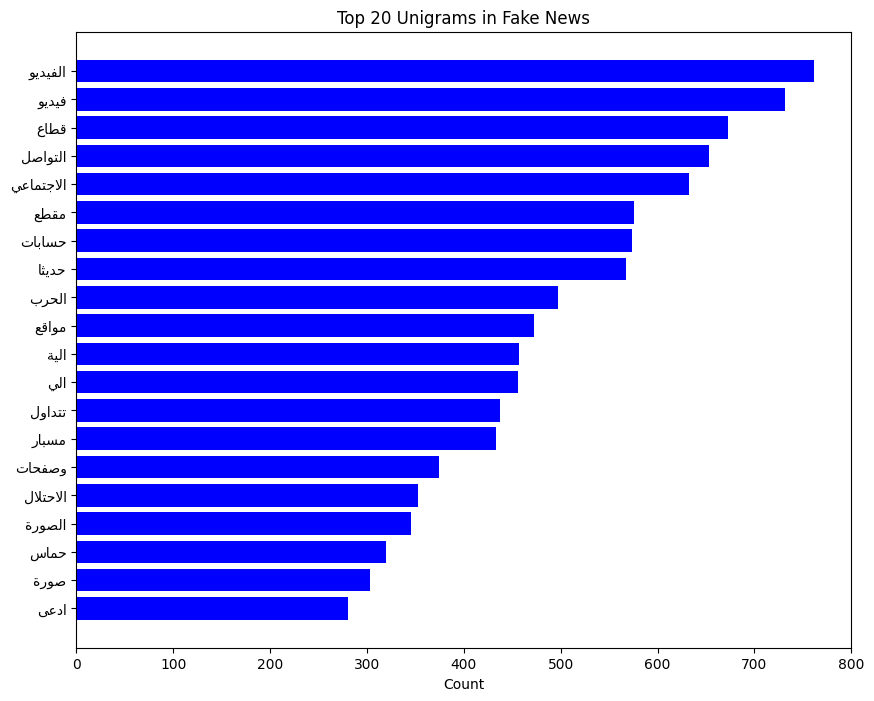

In [ ]:
plt.figure(figsize=(10, 8))
plt.barh(df_fake_unigrams['unigram'], df_fake_unigrams['count'], color='blue')
plt.xlabel('Count')
plt.title('Top 20 Unigrams in Fake News')
plt.gca().invert_yaxis()
plt.show()

## **‚Üí Top 20 Unigrams in Real News**

In [ ]:
#NERremoved['full_news_no_stopwords'] = NERremoved['full_news_no_stopwords'].apply(reshape_arabic)

common_real_unigrams = get_top_n_unigram(df_label_1['full_news_no_stopwords'], 20)

df_real_unigrams = pd.DataFrame(common_real_unigrams, columns=['unigram', 'count'])

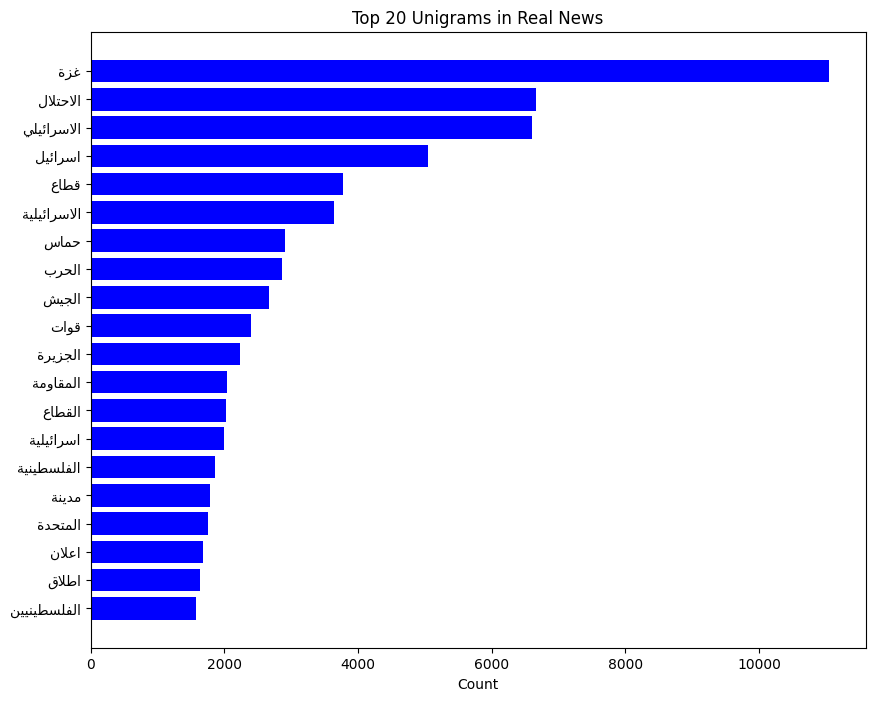

In [ ]:
plt.figure(figsize=(10, 8))
plt.barh(df_real_unigrams['unigram'], df_real_unigrams['count'], color='blue')
plt.xlabel('Count')
plt.title('Top 20 Unigrams in Real News')
plt.gca().invert_yaxis()
plt.show()

# **5. Feature Extraction: TF-IDF**

##  **Feature Extraction: TF-IDF (Term Frequency‚ÄìInverse Document Frequency)**

In natural language processing (NLP), raw text must be converted into a numerical format before feeding it into machine learning models. One of the most commonly used techniques for this transformation is **TF-IDF**.


---

###  **Why TF-IDF?**

- Helps identify **important words** in a document.
- Filters out **common but less informative words**.
- Produces a **sparse numerical representation** suitable for training machine learning models.

---

###  **Use in Our Project**

In our fake news classification task:

- We used `TfidfVectorizer` from `scikit-learn` to convert Arabic news articles into TF-IDF vectors.
- This allowed the model to learn patterns based on **word importance**, not just frequency.

---

###  **Example**

If the word **"ÿ∫ÿ≤ÿ©"** appears frequently in one article but not in others, it will have a **high TF-IDF score** in that article ‚Äî indicating its relevance.

---


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer


In [ ]:
vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(processedDataLemma['full_news_lemma_clean'].astype(str))

tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer.get_feature_names_out())


In [ ]:
tfidf_df.head(3)

ÿ¢ÿ®       ÿ¢ÿÆÿ±   ÿ¢ŸÑ  ÿ¢ŸÑÿ©  ÿ¢ŸÖŸÜ   ÿ¢ŸÜ  ÿ¢ŸÜÿ∞ÿßŸÉ  ÿ¢ŸÜÿ≥  ÿ¢ŸàŸâ   ÿ£ÿ®  ...  ŸäŸàŸÑŸäŸàÿ™ŸÖŸàÿ≤  \
0  0.0  0.046916  0.0  0.0  0.0  0.0    0.0  0.0  0.0  0.0  ...        0.0   
1  0.0  0.000000  0.0  0.0  0.0  0.0    0.0  0.0  0.0  0.0  ...        0.0   
2  0.0  0.055778  0.0  0.0  0.0  0.0    0.0  0.0  0.0  0.0  ...        0.0   

        ŸäŸàŸÖ      ŸäŸàŸÖŸä  ŸäŸàŸÜ  ŸäŸàŸÜÿ≥  ŸäŸàŸÜŸä  ŸäŸàŸÜŸäŸàÿ≠ÿ≤ŸäÿßŸÜ  ŸäŸàŸÜŸäŸàÿ≠ÿ≤Ÿäÿ±ÿßŸÜ  ŸäŸäŸÜ   Ÿ°Ÿ§  
0  0.053399  0.039006  0.0   0.0   0.0         0.0          0.0  0.0  0.0  
1  0.038795  0.000000  0.0   0.0   0.0         0.0          0.0  0.0  0.0  
2  0.000000  0.000000  0.0   0.0   0.0         0.0          0.0  0.0  0.0  

[3 rows x 5000 columns]

In [ ]:
# (Additional) Top words for each new
top_words_per_doc = tfidf_df.apply(lambda row: row.sort_values(ascending=False).head(3).index.tolist(), axis=1)
processedDataLemma['Top words'] = top_words_per_doc
print(processedDataLemma[['full_news_lemma_clean', 'Top words']].tail(10))


                                  full_news_lemma_clean              Top words
5341  ÿ≠ÿ±ÿ® ŸÖÿ®ÿßÿ¥ÿ± ŸÇÿ≥ÿßŸÖ ÿ®ÿ´ ŸÖÿ¥ŸáÿØ ÿ¨ÿØŸäÿØ ŸÑ ŸÖÿπÿ±ŸÉÿ© Ÿà ÿ≠ÿ±ÿßŸÉ ŸÖÿ™ÿ≥...    [ÿ≠ÿ±ÿßŸÉ, ÿ¨ÿØŸäÿØ, ŸÖÿ™ŸÅÿ±ŸÇ]
5342  ÿßŸÑÿ≠Ÿäÿ´Ÿäÿßÿ™ ŸÖÿ™ÿπŸÑŸÇ ÿ® ŸÖŸÇÿ∑ÿπ ŸÅŸäÿØŸäŸà ÿ£ÿ∏Ÿáÿ± ŸÜÿßÿ≤ÿ≠ ÿßŸáÿ™ŸÅŸâ ÿü ...     [ŸÖÿ¥ŸáÿØ, ÿßÿ≠ÿ™ŸÑÿßŸÑ, ŸáŸà]
5343  ÿßŸÑŸÅŸäÿØŸäŸà ÿßÿ¥ÿ™ÿ®ÿßŸÉ ŸÇÿØŸäŸÖ ŸÜÿ¥ÿ± ÿ≠ÿ≥ÿßÿ® ÿ® ÿπÿ±ÿ®Ÿä ŸÖŸàŸÇÿπ ÿå ÿ£ŸÖÿ≥...  [ÿπÿ±ÿ®Ÿä, ÿßŸÑŸÅŸäÿØŸäŸà, ŸÖÿ≥ÿπŸÅ]
5344  ÿßŸÑŸÅŸäÿØŸäŸà ŸÇÿØŸäŸÖ ŸÑ ŸÖŸÇÿ™ŸÑ ŸÇŸÜÿßÿµ ÿ•ÿ≥ÿ±ÿßÿ¶ŸäŸÑŸä ÿ™ÿØÿßŸàŸÑ ÿ≠ÿ≥ÿßÿ® Ÿà...     [ŸÇŸÜÿßÿµ, ŸÖŸÇÿ™ŸÑ, ÿßÿØÿπŸâ]
5345  ÿ™Ÿàÿ≥ÿπ ŸÖÿØÿßŸáŸÖÿ© ŸáŸà Ÿà ÿßŸÇÿ™ÿ≠ŸÖ ŸÖÿ≠Ÿàÿ± ÿßŸÇÿ™ÿ≠ŸÖ ÿ•ÿ≥ÿ±ÿßÿ¶ŸäŸÑŸä ŸÖÿØŸä...     [ÿØÿßŸáŸÖ, ŸáŸà, ÿßŸÇÿ™ÿ≠ÿßŸÖ]
5346  ÿ≠ÿ±ÿ® ŸÖÿ®ÿßÿ¥ÿ± ŸÖŸÇÿßŸàŸÖÿ© ÿ™ŸÉÿ®ÿØ ÿßÿ≠ÿ™ŸÑÿßŸÑ ÿÆÿ≥ÿßÿ±ÿ© ŸÉÿ®Ÿäÿ± Ÿà ÿÆŸÑÿßŸÅ...     [ÿ™ŸÉÿ®ÿØ, ÿÆŸÑÿßŸÅ, ÿ£ŸàŸÇÿπ]
5347  ÿ™ÿµÿ±Ÿäÿ≠ ŸÇÿØŸäŸÖ ŸÑ ŸÖŸÇÿ™ŸÑ ÿßÿ¥ÿ™ÿ®ÿßŸÉ ÿ≠ÿ±ÿ® ÿ¨ÿßÿ±Ÿä ÿ™ÿØÿßŸàŸÑ ÿ≠ÿ≥ÿßÿ® Ÿà...   [ŸÖŸÇÿ™ŸÑ, ÿ™ÿ≠ÿØÿ´, ÿßÿ¥ÿ™ÿ®ÿßŸÉ]
5348  ÿßŸÑŸÅŸäÿØŸ

# **6. Modeling and Evaluation**

## **‚Üí BERT**

In [ ]:
!pip install transformers datasets arabert nltk scikit-learn

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 185.0/185.0 kB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 179.3/179.3 kB 6.4 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 126.4/126.4 kB 9.7 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.4.2-py3-none-any.whl size=186456 sha256=0ee136a52d4c276894e0938a9ae9190f9111773fe10a32054fc65c3dc590f276
  Stored in directory: /root/.cache/pip/wheels/94/08/b4/78657b1541bb704b088317b52429ee4016d9888fe47dbb130f
Successfully built emoji


In [ ]:
!pip install numpy==1.26.4

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 61.0/61.0 kB 3.9 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 18.3/18.3 MB 36.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset
from sklearn.model_selection import train_test_split
import torch
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/processedDataLemma.csv")[['full_news_lemma_clean', 'Label']].dropna()
df.rename(columns={"full_news_lemma_clean": "text", "Label": "label"}, inplace=True)

In [ ]:
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df["label"], random_state=42)

In [ ]:
model_name = "asafaya/bert-mini-arabic"
tokenizer = AutoTokenizer.from_pretrained(model_name)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
def tokenize(batch):
    return tokenizer(batch["text"], padding="max_length", truncation=True, max_length=256)

In [ ]:
train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)

train_dataset = train_dataset.map(tokenize, batched=True)
test_dataset = test_dataset.map(tokenize, batched=True)

train_dataset = train_dataset.remove_columns(["text", "__index_level_0__"])
test_dataset = test_dataset.remove_columns(["text", "__index_level_0__"])

train_dataset.set_format("torch")
test_dataset.set_format("torch")


Map:   0%|          | 0/4280 [00:00<?, ? examples/s]

Map:   0%|          | 0/1071 [00:00<?, ? examples/s]

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at asafaya/bert-mini-arabic and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
training_args = TrainingArguments(
    output_dir="./results",
    save_strategy="steps",
    save_steps=20,
    per_device_train_batch_size=16,
  #  per_device_eval_batch_size=16,
    num_train_epochs=2,
    learning_rate=2e-5,
    logging_steps=50,
    fp16=True,
    disable_tqdm=False,
    report_to="none"
  #  weight_decay=0.01,
  #  logging_dir='./logs',
   # load_best_model_at_end=False
)


In [ ]:
from transformers import Trainer
from torch.nn import CrossEntropyLoss
import torch

class WeightedTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False, **kwargs):
        labels = inputs.get("labels")
        outputs = model(**inputs)
        logits = outputs.get("logits")


        class_weights = torch.tensor([2.7, 1.0]).to(model.device)
        loss_fct = CrossEntropyLoss(weight=class_weights)

        loss = loss_fct(logits, labels)
        return (loss, outputs) if return_outputs else loss

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    acc = accuracy_score(labels, preds)
    f1 = f1_score(labels, preds)
    return {"accuracy": acc, "f1": f1}

In [ ]:
trainer = WeightedTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)


/tmp/ipython-input-27-439960948.py:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `WeightedTrainer.__init__`. Use `processing_class` instead.
  trainer = WeightedTrainer(


In [ ]:
trainer.train()


TrainOutput(global_step=536, training_loss=0.2477025825585892, metrics={'train_runtime': 1223.3663, 'train_samples_per_second': 6.997, 'train_steps_per_second': 0.438, 'total_flos': 42414097121280.0, 'train_loss': 0.2477025825585892, 'epoch': 2.0})

In [ ]:
metrics = trainer.evaluate()
print("Evaluation metrics:", metrics)

Evaluation metrics: {'eval_loss': 0.34874895215034485, 'eval_accuracy': 0.8758169934640523, 'eval_f1': 0.9106783075889859, 'eval_runtime': 49.1902, 'eval_samples_per_second': 21.773, 'eval_steps_per_second': 2.724, 'epoch': 2.0}


In [ ]:
predictions = trainer.predict(test_dataset)
y_pred = predictions.predictions.argmax(-1)
y_true = predictions.label_ids

              precision    recall  f1-score   support

        Fake       0.71      0.90      0.80       288
        Real       0.96      0.87      0.91       783

    accuracy                           0.88      1071
   macro avg       0.84      0.88      0.85      1071
weighted avg       0.89      0.88      0.88      1071



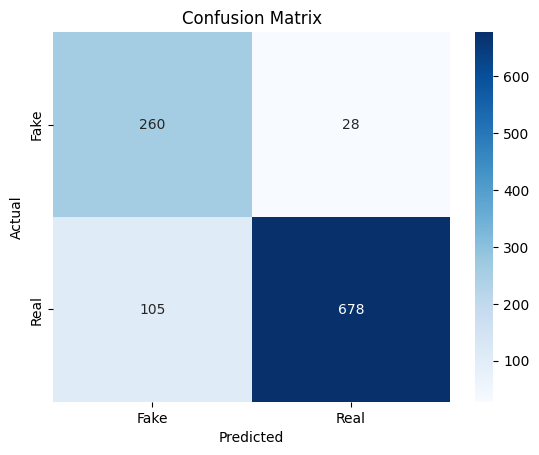

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


print(classification_report(y_true, y_pred, target_names=["Fake", "Real"]))

cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Fake", "Real"], yticklabels=["Fake", "Real"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


## **‚Üí Logistic Regression**

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/processedDataLemma.csv")[['full_news_lemma_clean', 'Label']].dropna()
df.rename(columns={"full_news_lemma_clean": "text", "Label": "label"}, inplace=True)

In [ ]:
X = df['text']
Y = df['label']

In [ ]:
# converting the textual data to numerical data
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=50000)
vectorizer.fit(X)

X = vectorizer.transform(X)

In [ ]:
#Splitting the dataset to training & test data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

In [ ]:

model = LogisticRegression()
model.fit(X_train, Y_train)

# accuracy score on the training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score of the training data : ', training_data_accuracy)

# accuracy score on the test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

lr_probs = model.predict_proba(X_test)[:, 1]

# Confusion matrix
cm = confusion_matrix(Y_test, X_test_prediction)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Fake', 'Real'],   # 0 = Fake, 1 = Real
            yticklabels=['Fake', 'Real'])   # ŸÜŸÅÿ≥ ÿßŸÑÿ™ÿ±ÿ™Ÿäÿ®
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('LogisticRegression Confusion Matrix')
plt.show()

# Classification report
print(classification_report(Y_test, X_test_prediction, target_names=["Fake", "Real"]))

pickle.dump(model, open("LogisticRegression_model.pkl", "wb"))


Accuracy score of the training data :  0.9109813084112149
Accuracy score of the test data :  0.8711484593837535


              precision    recall  f1-score   support

        Fake       0.84      0.65      0.73       288
        Real       0.88      0.95      0.92       783

    accuracy                           0.87      1071
   macro avg       0.86      0.80      0.82      1071
weighted avg       0.87      0.87      0.87      1071



## **‚Üí SVM**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [ ]:

model = SVC(kernel='linear', probability=True, class_weight='balanced')
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)
svc_probs = model.predict_proba(X_test)[:, 1]

# accuracy score on the training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of the training data : ', training_data_accuracy)

# accuracy score on the test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of the test data : ', test_data_accuracy)

# (Confusion Matrix)
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Fake', 'Real'],
            yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVC Confusion Matrix')
plt.show()


print(classification_report(Y_test, Y_pred, target_names=["Fake", "Real"]))


pickle.dump(model, open("svm_model.pkl", "wb"))
pickle.dump(vectorizer, open("vectorizer.pkl", "wb"))


Accuracy score of the training data :  0.9654205607476636
Accuracy score of the test data :  0.8832866479925303


              precision    recall  f1-score   support

        Fake       0.76      0.83      0.79       288
        Real       0.94      0.90      0.92       783

    accuracy                           0.88      1071
   macro avg       0.85      0.87      0.86      1071
weighted avg       0.89      0.88      0.88      1071



## **‚Üí Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

Accuracy score of the training data :  0.9992990654205608
Accuracy score of the test data :  0.8776844070961718


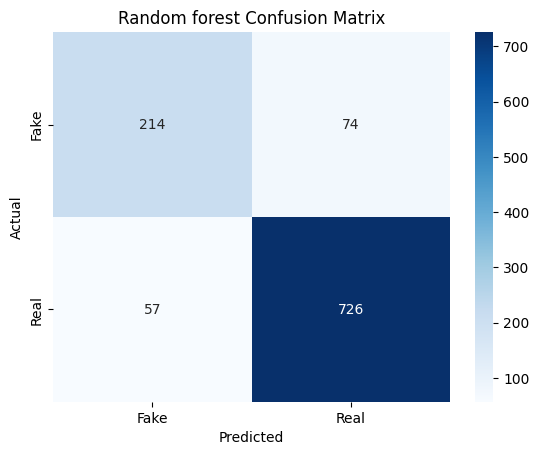

              precision    recall  f1-score   support

        Fake       0.79      0.74      0.77       288
        Real       0.91      0.93      0.92       783

    accuracy                           0.88      1071
   macro avg       0.85      0.84      0.84      1071
weighted avg       0.88      0.88      0.88      1071



In [ ]:
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train, Y_train)
rf_preds = rf_model.predict(X_test)
rf_probs = rf_model.predict_proba(X_test)[:, 1]

# accuracy score on the training data
X_train_prediction = rf_model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of the training data : ', training_data_accuracy)

# accuracy score on the test data
X_test_prediction = rf_model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of the test data : ', test_data_accuracy)



cm = confusion_matrix(Y_test, X_test_prediction)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Fake", "Real"], yticklabels=["Fake", "Real"])
plt.title("Random forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(classification_report(Y_test, X_test_prediction, target_names=["Fake", "Real"]))


In [ ]:
pickle.dump(model, open("rf_model.pkl", "wb"))

## **‚Üí XGBoost**

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
xgb_model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=8,
    scale_pos_weight=2,  # Handeling Imbalance
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

xgb_model.fit(X_train, Y_train)

y_pred = xgb_model.predict(X_test)

xgb_probs = xgb_model.predict_proba(X_test)[:, 1]

# accuracy score on the training data
X_train_prediction = xgb_model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of the training data : ', training_data_accuracy)

# accuracy score on the test data
X_test_prediction = xgb_model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of the test data : ', test_data_accuracy)


cm = confusion_matrix(Y_test, X_test_prediction)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Fake", "Real"], yticklabels=["Fake", "Real"])
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(classification_report(Y_test, X_test_prediction, target_names=["Fake", "Real"]))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:25:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
pickle.dump(model, open("xgb_model.pkl", "wb"))

## **Model Performance Comparison using ROC and Precision-Recall Curves**

###  **ROC Curve (Receiver Operating Characteristic)**



The ROC curve illustrates the trade-off between:

- **True Positive Rate (Sensitivity)** on the Y-axis  
- **False Positive Rate** on the X-axis

The closer the curve is to the top-left corner, the better the model is at distinguishing between the two classes.

#### AUC (Area Under the Curve) Results:

| Model                | AUC (ROC) |
|----------------------|-----------|
| SVC                  | 0.95      |
| Random Forest        | 0.94      |
| Logistic Regression  | 0.94      |
| XGBoost              | 0.95      |

 **Conclusion:** All models show strong classification performance, with SVC and XGBoost slightly outperforming the others.

---


### **Precision-Recall Curve**





This curve shows the trade-off between:

- **Recall** (on the X-axis)  
- **Precision** (on the Y-axis)

Precision-Recall curves are especially useful in cases of **class imbalance**.

#### Observations:

- All models start with very high precision.
- As recall increases, precision gradually drops ‚Äî which is expected since capturing more positives often increases false positives.

**Conclusion:** All models have very similar PR curves, with a slight edge for XGBoost and SVC in maintaining better balance between precision and recall.

---

In [ ]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt

def plot_curves(y_true, probs_svc, probs_rf, probs_lr, probs_xgb):
    fpr_svc, tpr_svc, _ = roc_curve(y_true, probs_svc)
    fpr_rf, tpr_rf, _ = roc_curve(y_true, probs_rf)
    fpr_lr, tpr_lr, _ = roc_curve(y_true, probs_lr)
    fpr_xgb, tpr_xgb, _ = roc_curve(y_true, probs_xgb)

    plt.figure(figsize=(14, 6))

    # ROC Curve
    plt.subplot(1, 2, 1)
    plt.plot(fpr_svc, tpr_svc, label=f'SVC (AUC = {auc(fpr_svc, tpr_svc):.2f})')
    plt.plot(fpr_rf, tpr_rf, label=f'RandomForest (AUC = {auc(fpr_rf, tpr_rf):.2f})')
    plt.plot(fpr_lr, tpr_lr, label=f'LogisticRegression (AUC = {auc(fpr_lr, tpr_lr):.2f})')
    plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc(fpr_xgb, tpr_xgb):.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()

    # Precision-Recall Curve
    plt.subplot(1, 2, 2)
    pr_svc, rc_svc, _ = precision_recall_curve(y_true, probs_svc)
    pr_rf, rc_rf, _ = precision_recall_curve(y_true, probs_rf)
    pr_lr, rc_lr, _ = precision_recall_curve(y_true, probs_lr)
    pr_xgb, rc_xgb, _ = precision_recall_curve(y_true, probs_xgb)
    plt.plot(rc_svc, pr_svc, label='SVC')
    plt.plot(rc_rf, pr_rf, label='RandomForest')
    plt.plot(rc_lr, pr_lr, label='LogisticRegression')
    plt.plot(rc_xgb, pr_xgb, label='XGBoost')
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")
    plt.legend()

    plt.tight_layout()
    plt.show()


plot_curves(Y_test, svc_probs, rf_probs, lr_probs,xgb_probs)


## **Model Evaluation on Unseen Data**
In this section, we test the best trained model on a separate test text that was not used during training or validation. This step helps us assess the generalization performance of each model on new, real-world-like data.

In [ ]:
import re
import requests

url = "https://raw.githubusercontent.com/mohataher/arabic-stop-words/master/list.txt"
response = requests.get(url)
arabic_stopwords = set(response.text.splitlines())

def clean_arabic_text(text):
    if not isinstance(text, str):
        return ""

    #  HTML tag removal
    text = re.sub(r'http\S+|www.\S+|pic\.twitter\.com/\S+', '', text)
    text = re.sub(r'<.*?>', '', text)

      #  Emoji removal
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"
        u"\U0001F300-\U0001F5FF"
        u"\U0001F680-\U0001F6FF"
        u"\U0001F1E0-\U0001F1FF"
        "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)

    #  diacritics removal
    text = re.sub(r'[\u064B-\u0652]', '', text)

    #  characters normalization
    text = re.sub(r'[ÿ•ÿ£ÿ¢ÿß]', 'ÿß', text)

    #  special characters removal
    text = re.sub(r'[ŸÄÿåÿõÿü!:\.\,\(\)\[\]\{\}"\'¬´¬ª\-_~‚Ä¶]', '', text)

    # keep Arabic latters only
    lines = text.split('\n')
    cleaned_lines = []
    for line in lines:
        if re.fullmatch(r'[^\u0600-\u06FF]+', line.strip()):
            continue
        line = re.sub(r'[^\u0600-\u06FF\s]', '', line)
        if line.strip():
            cleaned_lines.append(line.strip())

    clean_text = '\n'.join(cleaned_lines)

    # stop words removal
    clean_words = [word for word in clean_text.split() if word not in arabic_stopwords]
    final_text = ' '.join(clean_words)
    return final_text

In [ ]:
from IPython.display import display, HTML

def predict_news(text):
    cleaned_text = clean_arabic_text(text)
    vector = vectorizer.transform([text])
    prediction = model.predict(vector)[0]
    probabilities = model.predict_proba(vector)[0]

    confidence = round(probabilities[prediction] * 100, 2)
    label = "Real News" if prediction == 1 else "Fake News"

    return label, confidence


def display_prediction(text):
    label, confidence = predict_news(text)
    color = "#28a745" if label == "Real News" else "#dc3545"  # ÿ£ÿÆÿ∂ÿ± ÿ£Ÿà ÿ£ÿ≠ŸÖÿ±
    comment = "‚úÖ Ÿäÿ®ÿØŸà ÿ£ŸÜ ÿßŸÑÿÆÿ®ÿ± ÿ≠ŸÇŸäŸÇŸä." if label == "Real News" else "‚ö†Ô∏è Ÿáÿ∞ÿß ÿßŸÑÿÆÿ®ÿ± Ÿäÿ®ÿØŸà ÿ≤ÿßÿ¶ŸÅŸãÿß ÿ£Ÿà ÿ∫Ÿäÿ± ŸÖŸàÿ´ŸÇ."

    html_output = f"""
    <div style="border:1px solid #ccc; border-radius:8px; padding:15px; margin-bottom:20px; font-family:'Cairo', sans-serif">
        <p><strong>üìù ÿßŸÑŸÜÿµ:</strong><br>{text}</p>
        <p><strong>üìå ÿßŸÑÿ™ÿµŸÜŸäŸÅ:</strong> <span style="color:{color}; font-weight:bold">{label}</span></p>
        <p><strong>üìä ŸÜÿ≥ÿ®ÿ© ÿßŸÑÿ´ŸÇÿ©:</strong> {confidence}%</p>
        <p>{comment}</p>
    </div>
    """
    display(HTML(html_output))


In [ ]:
import pickle

model = pickle.load(open("xgb_model.pkl", "rb"))
vectorizer = pickle.load(open("vectorizer.pkl", "rb"))


texts = ["""ÿ®ÿßÿØŸÜŸä ŸÖÿ≥ÿ™ŸàŸâ ÿ•ÿ∑ŸÑÿßŸÇ ÿ™ŸÇÿ±Ÿäÿ± ŸÅŸÑÿ≥ÿ∑ŸäŸÜŸä ÿ£ÿ∏Ÿáÿ± ÿ™ÿ±ÿßÿ¨ÿπ ŸÖÿ§ÿ¥ÿ±ÿßÿ™ ÿßŸÇÿ™ÿµÿßÿØŸäÿ© Ÿàÿßÿ¨ÿ™ŸÖÿßÿπŸäÿ© ŸÅŸä ÿßŸÑÿ∂ŸÅÿ© ÿßŸÑÿ∫ÿ±ÿ®Ÿäÿ© ŸàŸÇÿ∑ÿßÿπ ÿ∫ÿ≤ÿ©. ŸÜŸÇŸÑÿ™ ŸÖÿµÿßÿØÿ± ŸÖÿ≠ŸÑŸäÿ© ÿπŸÜ ÿØÿ±ÿßÿ≥ÿ© ÿ≠ÿØŸäÿ´ÿ© ÿ£ŸÜ ŸÖÿπÿØŸÑÿßÿ™ ÿßŸÑÿ®ÿ∑ÿßŸÑÿ© ŸàÿßŸÑŸÅŸÇÿ± ŸàÿµŸÑÿ™ ÿ•ŸÑŸâ ŸÖÿ≥ÿ™ŸàŸäÿßÿ™ ÿ∫Ÿäÿ± ŸÖÿ≥ÿ®ŸàŸÇÿ© ŸÖŸÜÿ∞ ÿ≥ŸÜŸàÿßÿ™ÿå ŸÖÿØŸÅŸàÿπÿ© ÿ®ÿ™ÿ£ÿ´Ÿäÿ±ÿßÿ™ ÿßŸÑÿ≠ÿµÿßÿ± ŸàŸÇŸäŸàÿØ ÿßŸÑÿ™ŸÜŸÇŸÑ.

ŸàŸÉÿ¥ŸÅ ÿßŸÑÿ™ŸÇÿ±Ÿäÿ± ÿ£ŸÜ ÿßŸÑÿ£Ÿàÿ∂ÿßÿπ ÿßŸÑÿ£ŸÖŸÜŸäÿ© ÿßŸÑŸÖÿ™ŸÇŸÑÿ®ÿ© Ÿàÿ™ÿØŸáŸàÿ± ÿßŸÑÿ®ŸÜŸäÿ© ÿßŸÑÿ™ÿ≠ÿ™Ÿäÿ© ÿ≤ÿßÿØÿ™ ŸÖŸÜ ŸÖÿπÿßŸÜÿßÿ© ÿßŸÑÿ≥ŸÉÿßŸÜÿå ŸÖÿß ÿ£ÿ´ÿßÿ± ŸÇŸÑŸÇ Ÿàÿßÿ≥ÿπ ÿ®ŸäŸÜ ÿßŸÑŸÖÿ≥ÿ§ŸàŸÑŸäŸÜ ÿßŸÑŸÅŸÑÿ≥ÿ∑ŸäŸÜŸäŸäŸÜ ŸàÿßŸÑŸÖÿ¨ÿ™ŸÖÿπ ÿßŸÑŸÖÿØŸÜŸä. Ÿàÿπÿ®Ÿëÿ± ŸÖÿ≥ÿ§ŸàŸÑ ÿ±ŸÅŸäÿπ ÿπŸÜ ÿßÿ≥ÿ™Ÿäÿßÿ¶Ÿá ŸÖŸÜ ÿ™ÿØŸáŸàÿ± ÿßŸÑÿÆÿØŸÖÿßÿ™ ÿßŸÑÿ£ÿ≥ÿßÿ≥Ÿäÿ©ÿå ŸÇÿßÿ¶ŸÑÿßŸã ÿ•ŸÜ ÿßŸÑŸàÿ∂ÿπ ÿßŸÑÿ±ÿßŸáŸÜ ‚Äúÿ∫Ÿäÿ± ŸÖŸÇÿ®ŸàŸÑ ŸàŸäÿ™ÿ∑ŸÑÿ® ÿ™ÿØÿÆŸÑ ÿπÿßÿ¨ŸÑ‚Äù.

Ÿàÿ£ÿ¥ÿßÿ± ÿßŸÑÿ™ŸÇÿ±Ÿäÿ± ÿ•ŸÑŸâ ÿ£ŸÜ ÿßŸÑÿ¥ÿ®ÿßÿ® ÿßŸÑŸÅŸÑÿ≥ÿ∑ŸäŸÜŸä Ÿäÿ¥ŸÉŸÑŸàŸÜ ÿ£ŸÉÿ®ÿ± ŸÅÿ¶ÿ© ŸÖÿ™ÿ∂ÿ±ÿ±ÿ©ÿå ÿ≠Ÿäÿ´ ÿ£ŸÜ ŸÅÿ±ÿµ ÿßŸÑÿ™ÿπŸÑŸäŸÖ ŸàÿßŸÑÿπŸÖŸÑ ÿ™ÿ±ÿßÿ¨ÿπÿ™ ÿ®ÿ¥ŸÉŸÑ ŸÖŸÑÿ≠Ÿàÿ∏. Ÿàÿ∞ŸÉÿ± ÿ™ŸÇÿ±Ÿäÿ± ŸÖÿ≠ŸÑŸä ÿ£ŸÜ ÿßÿ±ÿ™ŸÅÿßÿπ ÿ£ÿ≥ÿπÿßÿ± ÿßŸÑÿ≥ŸÑÿπ ŸàÿßŸÑÿÆÿØŸÖÿßÿ™ Ÿäÿ∂ÿ∫ÿ∑ ÿπŸÑŸâ ÿßŸÑÿ£ÿ≥ÿ± ÿßŸÑŸÅŸÇŸäÿ±ÿ©ÿå ŸÖŸÖÿß ÿ≤ÿßÿØ ŸÖŸÜ ÿ≠ÿ¨ŸÖ ÿßŸÑÿßÿ≠ÿ™ÿ¨ÿßÿ¨ÿßÿ™ ÿßŸÑÿ¥ÿπÿ®Ÿäÿ© ŸÅŸä ÿßŸÑŸÖÿØŸÜ ÿßŸÑŸÅŸÑÿ≥ÿ∑ŸäŸÜŸäÿ©.

Ÿàÿ±ÿ∫ŸÖ ÿßŸÑŸÖÿ≠ÿßŸàŸÑÿßÿ™ ÿßŸÑÿØŸàŸÑŸäÿ© ŸÑÿ™ŸÇÿØŸäŸÖ ÿßŸÑÿØÿπŸÖÿå ŸÖÿß ÿ≤ÿßŸÑÿ™ ÿßŸÑÿ™ÿ≠ÿØŸäÿßÿ™ ŸÉÿ´Ÿäÿ±ÿ©ÿå Ÿàÿ£ŸÉÿØÿ™ ŸÖŸÜÿ∏ŸÖÿßÿ™ ÿ≠ŸÇŸàŸÇ ÿßŸÑÿ•ŸÜÿ≥ÿßŸÜ ÿ∂ÿ±Ÿàÿ±ÿ© ÿ™ÿπÿ≤Ÿäÿ≤ ÿßŸÑÿ¨ŸáŸàÿØ ŸÑÿ±ŸÅÿπ ÿßŸÑÿ≠ÿµÿßÿ± Ÿàÿ™ÿ≠ŸÇŸäŸÇ ÿßÿ≥ÿ™ŸÇÿ±ÿßÿ± ÿØÿßÿ¶ŸÖ. Ÿàÿßÿ≥ÿ™ŸÇÿ± ŸÖÿπÿØŸÑ ŸÇÿ®ŸàŸÑ ÿßŸÑÿ≥ŸÉÿßŸÜ ŸÑŸÑÿ£Ÿàÿ∂ÿßÿπ ÿßŸÑÿ≠ÿßŸÑŸäÿ© ÿπŸÜÿØ ŸÖÿ≥ÿ™ŸàŸäÿßÿ™ ŸÖŸÜÿÆŸÅÿ∂ÿ©ÿå ŸÖÿß ŸäÿπŸÉÿ≥ ÿ≠ÿßŸÑÿ© ÿßŸÑÿ•ÿ≠ÿ®ÿßÿ∑ ÿßŸÑÿπÿßŸÖ ÿ®ŸäŸÜ ÿßŸÑŸÖŸàÿßÿ∑ŸÜŸäŸÜ.""",


         """ÿßŸÑÿßÿØÿπÿßÿ° ÿ®ÿÆÿµŸàÿµ ÿ™ÿØŸÖŸäÿ± ŸÖÿ≥ÿßÿπÿØÿßÿ™ ŸÖŸÜ ÿ¥ÿ±ŸÉÿßÿ™ ÿ™ÿØÿπŸÖ ÿ•ÿ≥ÿ±ÿßÿ¶ŸäŸÑ ÿ®ÿØŸàŸÜ ÿ•ÿ´ÿ®ÿßÿ™ ÿ£Ÿà ŸÖÿµÿØÿ± ŸÖŸàÿ´ŸàŸÇ.""",


         """ÿßŸÑŸÅŸäÿØŸäŸà ÿßÿ¥ÿ™ÿ®ÿßŸÉ ŸÖŸÇÿßŸàŸÖÿ© ÿ™ÿØÿßŸàŸÑ ÿ≠ÿ≥ÿßÿ® Ÿà ÿµŸÅÿ≠ÿ© ŸÖŸàŸÇÿπ ÿ™ŸàÿßÿµŸÑ ÿßÿ¨ÿ™ŸÖÿßÿπŸä ÿå ŸÇŸÑŸäŸÑ ÿå ŸÖŸÇÿ∑ÿπ ŸÅŸäÿØŸäŸà ÿ£ÿØÿπŸâ ÿßÿ¥ÿ™ÿ®ÿßŸÉ ÿπŸÜŸäŸÅ ŸÖŸÇÿßŸàŸÖÿ© ŸÖÿ≥ÿ™Ÿàÿ∑ŸÜÿ© ÿ∫ŸÑÿßŸÅ ÿπŸÖŸÑŸäÿ© ÿ∑ŸàŸÅÿßŸÜ ÿ£ŸÇÿµŸâŸÖŸÖÿß ÿ≤ÿßÿØ ŸÖŸÜ ÿ≠ÿ¨ŸÖ ÿßŸÑÿßÿ≠ÿ™ÿ¨ÿßÿ¨ÿßÿ™ ÿßŸÑÿ¥ÿπÿ®Ÿäÿ©

"""]

for t in texts:
    display_prediction(t)
